# Face Recognition Project

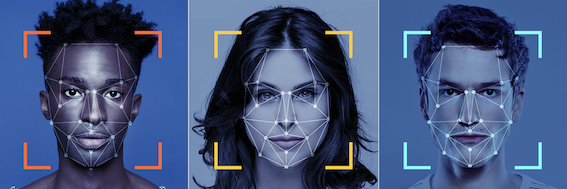

В этом проекте мы погрузимся во фреймворк распознавания лиц и обучим нейронную сеть задаче распознавания лиц,
поиграемся с потерями и метриками.
Мы будем обучать нейронную сеть на [наборе данных CelebA](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).

Как мы видим на сайте, изображения набора данных celebA выглядят так:


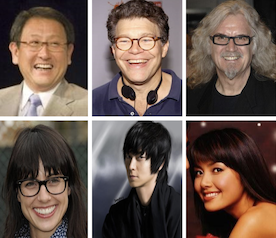

Но мы не будем обучать нейронную сеть распознаванию лиц на этих изображениях. Сначала нам нужно их предварительно обработать. Давайте посмотрим, зачем нам это нужно и как нам нужно их предварительно обработать.

Давайте посмотрим, как работают системы распознавания лиц:

## Обучение модели распознавания лиц и настройка логического вывода

В этом разделе описывается, как обучаются модели распознавания лиц, что такое выравнивание данных и как выглядит вывод модели распознавания лиц. Если вы знакомы с этим, вы можете пропустить этот раздел.

### Обучение модели

Чтобы обучить модель распознавания лиц на любом наборе данных лиц, изображения должны быть сначала выровнены. Этот шаг очень важен для достижения хорошего качества распознавания лиц.

Что такое выравнивание: оно состоит из трех шагов:
1. По заданному изображению определить ориентиры лица на изображении (координаты точек глаз, носа и рта). Здесь можно использовать отдельную нейросеть, обученную распознавать ориентиры на изображениях лица. Вы можете обратиться к [учебнику PyTorch Landmarks](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html), чтобы узнать, как это работает.
2. Поверните все изображения в наборе данных так, чтобы глаза человека на каждом изображении лежали на определенной заранее определенной горизонтальной линии.
3. Масштабируйте все изображения в наборе данных так, чтобы размеры лиц были примерно одинаковыми.

Вот пример того, что мы получим после выравнивания всех изображений Аарона Пирсола из нашего набора данных:

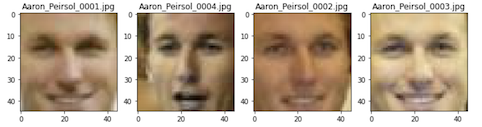

Вы видите, что глаза всех лиц лежат на одной горизонтальной линии и все лица имеют почти одинаковый размер. Если мы выровняем все изображения в наборе данных, мы сможем обучить нейронную сеть на выровненных изображениях.

**Зачем нужна процедура выравнивания**: выравнивание всех лиц в наборе данных упрощает задачу распознавания лиц для модели. Если все лица, которые видит модель, имеют одинаковый размер и имеют свои ориентиры (глаза, нос и т. д.) почти на одних и тех же участках изображения, модели легче научиться распознавать человека на изображении. Модель не должна «искать» положение лица и глаз на изображении перед распознаванием.

Если вам интересно, вы также можете обучить модель на невыровненных изображениях, но вы увидите, что она будет работать плохо. Хотя можно обучить модель распознаванию лиц без предварительного выравнивания всех лиц, но для этого потребуется огромное количество данных — больше, чем есть почти у любой компании. Единственная компания, которая открыто представила свою систему распознавания лиц, не требующую специального выравнивания, — это Facebook — их нейронная сеть была обучена на действительно огромном количестве данных с помощью специального трюка, позволяющего избежать выравнивания. Вы можете прочитать более подробную информацию [здесь](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

### Вывод модели

Итак, давайте посмотрим, как модель, обученная на выровненных лицах, может использоваться в реальном мире:

Предположим, вы должны компании и хотите построить систему распознавания лиц для своего рабочего офиса. Вы решили развесить по офису несколько камер и хотите, чтобы они могли распознавать лица всех ваших сотрудников, когда они сидят/ходят по офису (предоставляем вам самим решать, зачем вам такая система в вашем офисе)


Система распознавания лиц обычно состоит из 3 этапов:
- обнаружение лица
- выравнивание лица
- распознавание лица

Давайте обсудим их подробно:

**Распознавание лиц**

Когда камера висит на стене, она записывает видео и разбивает видео на отдельные изображения, например:

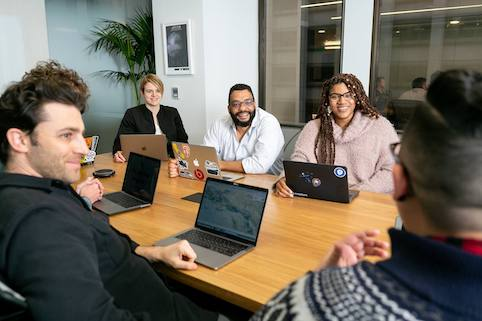

Чтобы иметь возможность распознавать все лица на фотографии, вам нужно сначала обнаружить все лица, присутствующие на фотографии, например:

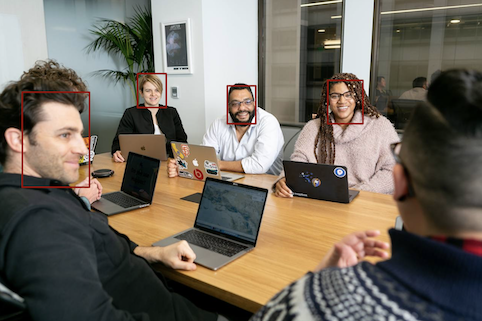

Это первая часть — обнаружение. Вы можете использовать для этого любую нейронную сеть, которая может обнаруживать людей.

**Выравнивание лица**

Второй этап заключается в выравнивании всех найденных граней. Процедура выравнивания здесь должна быть такой же, как и для выравнивания обучающих изображений.

Таким образом, мы получим изображение парня на фотографии, выровненное следующим образом:

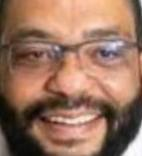

**Распознавание лица**

На третьем этапе мы используем нейронную сеть, которую мы обучили распознавать лицо.

Вот как работает конвейер моделей распознавания лиц. Вы также можете прочитать об этом подробнее на [ссылка](https://www.nytimes.com/wirecutter/blog/how-facial-recognition-works/) (и с помощью поиска в интернете)

## Архитектура модели нейронной сети

Давайте обсудим, как должна выглядеть модель для распознавания лиц.



Самый простой и, на самом деле, наиболее часто используемый способ построения нейронной сети для распознавания лиц — построить ее как **простой классификатор**.

Предположим, у нас есть набор данных с фотографиями N разных людей. Затем мы можем построить нейронную сеть, чтобы классифицировать все изображения из набора данных по N классам. Каждый класс относится к одному уникальному человеку в наборе данных.

**Как тогда мы будем распознавать новых людей с помощью этой сети?** На самом деле мы хотим, чтобы сеть для распознавания лиц могла распознавать не только людей, которые находятся в обучающей выборке, но и почти каждого человека в мире.

Вот как: после обучения модели мы сбрасываем последний слой классификации. После этого, когда мы будем передавать изображение человека по сети, мы получим результат предпоследнего слоя — это **эмбеддинг изображения**. Имея вложения двух разных изображений, мы можем сравнить их, используя **косинусное расстояние**. Чем меньше расстояние — тем выше вероятность того, что эти две фотографии принадлежат одному человеку.

Используя эту технику, мы можем получить вложения каждого изображения — даже невидимых людей, сравнить их и выявить изображения, принадлежащие одним и тем же людям.

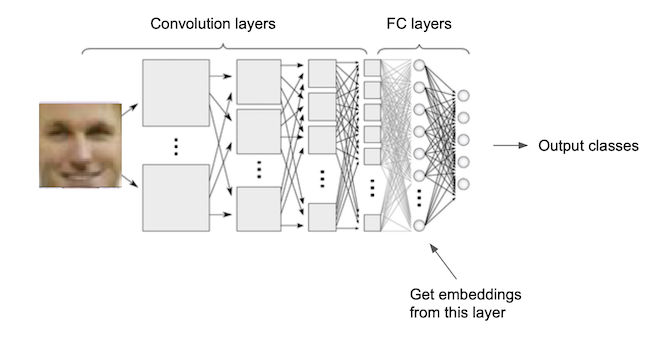

## Построим нейронную сеть для детекции лиц без использования примеров, описанных выше (это будет уже в следующем примере)

### Dataset 

Гатренируем нашу модель на наборе данных [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). Но мы будем использовать его версию, в которой все изображения выровнены и обрезаны. Скачать набор данных можно по этой ссылке: https://disk.yandex.ru/d/S8f03spLIA1wrw или с помощью кода ниже:

### Загрузим данные

In [4]:
# ! pip install wldhx.yadisk-direct
# ! curl -L $(yadisk-direct https://disk.yandex.ru/d/S8f03spLIA1wrw) -o celebA_train.zip
# ! unzip -o celebA_train.zip

In [6]:
# ! ls celebA_train_500/

### Установим недостающие модули

In [3]:
# ! pip install timm
# # pip install ipywidgets
# ! pip install torchmetrics
# ! pip install pytorch_metric_learning

- celebA_imgs — folder with aligned images 
- celebA_anno.txt — file with annotations: which person each image corresponds to
- celebA_train_split.txt — file with train/val/test info

### Импортируеим модули

In [1]:
import cv2
import gc
import itertools
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import timm
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import warnings

from collections import defaultdict
from PIL import Image
from pytorch_metric_learning import losses
from skimage import io, transform, data
from skimage.feature import Cascade
from skimage.io import imread
from torch import nn
from torch.optim import lr_scheduler, Adam
from torch.utils.data import Dataset
from torchmetrics.functional import pairwise_cosine_similarity
from tqdm import tqdm
from typing import Union

In [2]:
warnings.filterwarnings('ignore') 

### Функции, которые нам облегчат жизнь в этом проекте

In [3]:
def show_imgs(images_names: list) -> None:
    '''
    Функция показа фото из распакованного архива
    На вход: список фото
    На выходе: показ фото
    '''
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

In [4]:
def get_paths(dataset_type: str='train') -> np.array:
    '''
    Функция, которая возвращает список путей к изображениям для заданного типа параметров набора данных:
    На вход подается тип данных: один из 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_500/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_500/celebA_imgs/', filename))
    
    return np.array(images_paths)

In [5]:
def fit_epoch(
    model: Union[str,
    nn.Module],
    train_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    optimizer: torch.optim,
    sheduler: torch.nn=None
) -> Union[np.array, float]:
    '''
    Функция обучения на эпохе
    На вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    На выходе: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train
    
    for i, batch in enumerate(train_loader):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        optimizer.zero_grad()
        logits = model(X_batch.to(device))
        loss = loss_fn(logits, y_batch.to(device))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        y_pred = torch.argmax(logits, dim=1)
        num_correct += torch.sum(y_pred.cpu() == y_batch)
        
    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [6]:
def eval_epoch(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[np.array, float]:
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''    
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        
        with torch.no_grad():
            logits = model(X_batch.to(device))
            
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            
            num_correct += torch.sum(y_pred.cpu() == y_batch)
    
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

In [7]:
def train(
    train_loader: torch.utils.data.DataLoader,
    val_loader: torch.utils.data.DataLoader,
    model: nn.Module,
    epochs: int,
    batch_size: int,
    optimizer: torch.optim=None,
    criterion: torch.nn=None,
    sheduler: torch.nn=None
) -> Union[nn.Module, dict]:
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''        
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели
    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch(model, train_loader, criterion, opt, sheduler)
            print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch(model, val_loader, criterion)
            history.append((epoch, train_loss, train_acc, val_loss, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Acc: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    return model, history

In [8]:
def evaluate(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[np.array, float]:
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''       
    losses = []

    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in tqdm(enumerate(dataloader), desc='Test images'):
        
        X_batch, y_batch = batch['image'], batch['label']
        num_elements += len(y_batch)
        
        with torch.no_grad():

            logits = model(X_batch.to(device))
            
            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            
            num_correct += torch.sum(y_pred.cpu() == y_batch)
    
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

In [9]:
def get_embeddings(model: nn.Module, img_list: list) -> list:
    '''
    Функция получения эмбеддингов
    принимает на вход: модель, список картинок
    отдает: список эмбеддингов
    '''       
    batch_size = 1
    loader = torch.utils.data.DataLoader(img_list, batch_size=batch_size, shuffle=False)
    
    model.eval()
    
    for i, batch in enumerate(loader):
        
        with torch.no_grad():
            embeddings = model(batch.to(device))
            
    return embeddings.cpu()

In [10]:
def compute_embeddings(model: nn.Module, images_list: list, path: list) -> list:
    '''
    Функция получения эмбеддингов списка фото.
    На входе: модель, список фото, каталог с фото
    На выходе: список эмбеддингов фото
    '''
    model.eval()
    
    embeddings = []
    image_list = []
    
    for i in range(len(images_list)):
        img_name = images_list[i]
        image = Image.open(os.path.join(path, img_name))
        image = transform(image)
        image_list.append(image)

    image_torch = torch.stack(tuple(image_list))
    loader = torch.utils.data.DataLoader(image_torch, batch_size=batch_size, shuffle=False)
    
    for i, batch in tqdm(enumerate(loader), desc='Get embeddings'):
        with torch.no_grad():
            logits = model(batch.to(device))

            for x in range(len(logits)):
                embeddings.append(logits[x].tolist())
        
    return embeddings
    raise NotImplementedError  

In [11]:
def type_embeddings(dataset_type: type) -> Union[dict, list]:
    '''
      Функция получения словаря, ключем которого является метка класса, значеним имя файла с картинкой
      и списка имен файлов, соответствующий типу данных
      на вход принимает: тип данных
      на выходе: словарь, список имен файлов
    '''    
    images = get_paths(dataset_type=dataset_type)

    f = open('celebA_train_500/celebA_anno.txt', 'r')
    type_lines = f.readlines()
    f.close()
    type_lines = [x.strip().split() for x in type_lines]
    type_lines = {x:y for x, y in type_lines}
    type_img_names = [x.split('/')[2] for x in images]

    type_dict = defaultdict(list)
    for img_name, img_class in type_lines.items():
        if img_name in type_img_names:
            type_dict[img_class].append(img_name)
    return type_dict, type_img_names

In [12]:
def compute_cosine_query_pos(
    query_dict: dict,
    query_img_names: list,
    query_embeddings: list
) -> list:
    '''
    Функция подсчета косинусного сходства между положительными парами.
    На вхлод: словарь {наименование фото: класс изображения},
    список имен фото, список эмбеддингов.
    На выходе: список косинусного сходства
    '''
    cosine_query_pos = []

    for key, value in tqdm(query_dict.items(), desc = 'Progress'):
        if len(value) > 1:
            for subset in itertools.combinations(value, 2):
                idx_test = query_img_names.index(subset[0])
                idx_train = query_img_names.index(subset[1])
                test_embs = query_embeddings[idx_test]
                train_embs = query_embeddings[idx_train]
                pcs = np.dot(test_embs, train_embs)/(np.linalg.norm(test_embs)*np.linalg.norm(train_embs))
                cosine_query_pos.append(pcs)
        
    return cosine_query_pos

In [13]:
def compute_cosine_query_neg(
    query_dict: dict,
    query_img_names: list,
    query_embeddings: list
) -> list:
    '''
    Функция подсчета косинусного сходства между отрицательными парами.
    На вхлод: словарь {наименование фото: класс изображения},
    список имен фото, список эмбеддингов.
    На выходе: список косинусного сходства
    '''
    cosine_query_neg = []
    subset_set = []
    for subset in itertools.combinations(query_dict.keys(), 2):
        subset_set.append(subset)
    for i in tqdm(range(len(subset_set)), desc = 'Subset'):
        for img_1 in range(len(query_dict[subset_set[i][0]])):
            for img_2 in range(len(query_dict[subset_set[i][1]])):
                idx_value_1 = query_img_names.index(query_dict[subset_set[i][0]][img_1])
                idx_value_2 = query_img_names.index(query_dict[subset_set[i][1]][img_2])
                value_1_embs = query_embeddings[idx_value_1]
                value_2_embs = query_embeddings[idx_value_2]
                pcs = np.dot(value_1_embs, value_2_embs)/(np.linalg.norm(value_1_embs)*np.linalg.norm(value_2_embs))
                cosine_query_neg.append(pcs)

    return cosine_query_neg

In [14]:
def compute_cosine_query_distractors(
    query_embeddings: list,
    distractors_embeddings: list
)-> list:
    '''
    Функция подсчета косинусного сходства между негативными парами и дистракторов
    На вход: список негативных пар, список эмбеддингов дистрактора.
    На выходе: косинусное сходство между ними
    '''
    cosine_query_distractors = []
    for i in tqdm(range(len(query_embeddings)), desc='query_embeddings'):
        for j in range(len(distractors_embeddings)):
        # for j in tqdm(range(len(distractors_embeddings)), desc='distractors_embeddings', leave=False):
            pcs = np.dot(
                query_embeddings[i], distractors_embeddings[j]
            )/(
                np.linalg.norm(query_embeddings[i])*np.linalg.norm(distractors_embeddings[j])
            )
            cosine_query_distractors.append(pcs)
    return cosine_query_distractors

In [15]:
def compute_ir(
    cosine_query_pos: list,
    cosine_query_neg: list,
    cosine_query_distractors: list,
    fpr: float=0.1
) -> Union[float, float]:
    '''
    Функция, вычисляющая качество идентификации,
    используя докомпьютерные косинусные сходства между парами при заданном fprю
    На вход:
        косинусное сходство между положительными парами,
        косинусное сходство между отрицательными парами,
        косинусное сходство между отрицательными парами и эмбеддингов дистрактора,
        частота ложных срабатываний, по которой можно вычислить TPR.
    На выходе: пороговое сходство, true positive rate
    '''
    n_fp = len(cosine_query_neg) + len(cosine_query_distractors)
    N = fpr * n_fp
    thr = sorted(cosine_query_neg + cosine_query_distractors, reverse=True)[round(N)]
    fpr = len([i for i, v in enumerate(cosine_query_pos) if v >= thr])
    tpr = fpr / len(cosine_query_pos)
    
    return thr, tpr

In [16]:
def custom_loss(
    distance_function: list,
    margin: float,
    swap: bool
) -> float:
    '''
    Функция получения сводного лосса по модели
    на вход принимает: функцию определения расстояние м/у векторами, значение допуска и обмена
    на выходе: сводный лосс
    '''
    loss1 = nn.TripletMarginWithDistanceLoss(distance_function=distance_function, margin=margin, swap=swap)
    loss2 = nn.CrossEntropyLoss()
    def helper(anchor_emb, pos_emb, neg_emb, logits, label):
        '''
          Функция лоссов по модели
          на вход принимает: эмбеддинги (якорь, позитивный и негативный) и конечный с линейного слоя
          на выходе: результат сводного лосса
        '''
        return loss1(anchor_emb, pos_emb, neg_emb) + loss2(logits, label)
    return helper

In [17]:
def fit_epoch_TripletLoss(
    model: nn.Module,
    train_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    optimizer: torch.nn,
    sheduler: torch.nn=None
) -> Union[float, float]:
    '''
    Функция обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []
    losses_cl = []
    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train

    for i, batch in enumerate(train_loader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)
        optimizer.zero_grad()
        logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
        
        loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
        losses.append(loss.item())

        
        loss.backward()
        optimizer.step()
        
        y_pred = torch.argmax(logits, dim=1)
        num_correct += torch.sum(y_pred.cpu() == label.cpu())

    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [18]:
def eval_epoch_TripletLoss(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[float, float]:
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''       
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
            
            loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [19]:
def train_TripletLoss(
    train_files: torch.utils.data.DataLoader,
    val_files: torch.utils.data.DataLoader,
    model: nn.Module,
    epochs: int,
    batch_size: int,
    optimizer: torch.nn=None,
    criterion: torch.nn=None,
    sheduler: torch.nn=None
) -> Union[nn.Module, dict]:
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''          
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели

    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch_TripletLoss(model, train_loader, criterion, opt, sheduler)
            print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch_TripletLoss(model, val_loader, criterion)
            history.append((epoch, train_loss, val_loss, train_acc, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Loss: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    return model, history

In [20]:
def evaluate_TripletLoss(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[float, float]:
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''          
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        anchor, positive, negative, label = batch['anchor'].to(device), batch['positive'].to(device), batch['negative'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logits_anchor, logits_positive, logits_negative, logits = model(anchor, positive, negative)
            
            loss = loss_fn(logits_anchor, logits_positive, logits_negative, logits, label)
            losses.append(loss.item())
            
            y_pred = torch.argmax(logits, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [21]:
def l_infinity(x: list[torch.tensor], y: list[torch.tensor]) -> list[torch.tensor]:
    '''
    Функция расчета расстояния м/у векторами
    принимает на вход: два вектора
    отдает: расстояние м/у ними
    '''        
    dists = 1 - pairwise_cosine_similarity(x, y).diag()
    
    return dists

In [22]:
def custom_loss_ArcFace(
    num_classes: int,
    embedding_size: int,
    margin: float,
    scale: int
) -> list[float]:
    '''
      Функция получения сводного лосса по модели
      на вход принимает: функцию определения расстояние м/у векторами, значение допуска и обмена
      на выходе: сводный лосс
    '''
    loss1 = losses.ArcFaceLoss(num_classes=num_classes, embedding_size=embedding_size, margin=margin, scale=64)
    loss2 = nn.CrossEntropyLoss()
    def helper(logit_em, logit_cl, label):
        return loss1(logit_em, label) + loss2(logit_cl, label)
    return helper

In [23]:
def eval_epoch_ArcFace(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[float, float]:
    '''
    Функция проверки обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''        
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)

        
        with torch.no_grad():
            logit_em, logit_cl = model(logit)
            loss = loss_fn(logit_em, logit_cl, label)
            losses.append(loss.item())

            y_pred = torch.argmax(logit_cl, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements

            
    return accuracy.numpy(), np.mean(losses)

In [24]:
def fit_epoch_ArcFace(
    model: nn.Module,
    train_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn,
    optimizer: torch.nn,
    sheduler: torch.nn=None
) -> Union[float, float]:
    '''
    Функция обучения на эпохе
    принимает на вход: модель, даталоадер, функцию потерь, функцию оптимизатора и планировщика
    отдает: масив метрики accuracy, средний лосс по эпохе
    '''
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.train(True) # так как нам необходимо оптимизировать данные на train

    for i, batch in enumerate(train_loader):

        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)
        optimizer.zero_grad()
        logit_em, logit_cl = model(logit)
        loss = loss_fn(logit_em, logit_cl, label)
        losses.append(loss.item())
        y_pred = torch.argmax(logit_cl, dim=1)
        num_correct += torch.sum(y_pred.cpu() == label.cpu())
        
        loss.backward()
        optimizer.step()
        
    if sheduler is not None: # проверяем нужна ли нам оптимизация
        sheduler.step() # если да, то делаем шаг оптимизации
    
    accuracy = num_correct / num_elements
    
    return accuracy.numpy(), np.mean(losses)

In [25]:
def train_ArcFace(
    train_files: torch.utils.data.DataLoader,
    val_files: torch.utils.data.DataLoader,
    model: nn.Module,
    epochs: int,
    batch_size: int,
    optimizer: torch.nn=None,
    criterion: torch.nn=None,
    sheduler: torch.nn=None
) -> Union[nn.Module, dict]:
    '''
    Функция обучения по эпохам
    принимает на вход: даталоадер с тренировочными данными, даталоадер с проверочными данными ,модель,
    количество эпох обучения, размер батча, оптимайзер, функцию потерь, планировщик
    отдает: лучшую модель на обучении, историю обучения
    '''     
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters()) # будем использовать модель Adam
    if criterion is None:
        criterion = nn.CrossEntropyLoss() # будем использовать кросэнтропию
    
    best_model = model.state_dict() # сохраняем все тензоры модели
    best_acc = 0.0 # для понимания лучшего скора модели
    
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = criterion

        for epoch in range(epochs):
            train_acc, train_loss = fit_epoch_ArcFace(model, train_loader, criterion, opt, sheduler)
            print("loss", train_loss)
            
            val_acc, val_loss = eval_epoch_ArcFace(model, val_loader, criterion)
            history.append((epoch, train_loss, val_loss, train_acc, val_acc))
            
            if val_acc > best_acc:
                best_acc = val_acc
                best_model = model.state_dict()
                            
            pbar_outer.update(1)
            
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    print('Best val Loss: {:4f}'.format(best_acc))
    model.load_state_dict(best_model)
    
    return model, history

In [26]:
def evaluate_ArcFace(
    model: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn
) -> Union[float, float]:
    '''
    Функция проверки обучения
    принимает на вход: модель, даталоадер с проверочными данными, функцию потерь
    отдает: масив метрики accuracy, средний лосс по проверке
    '''       
    losses = []
    num_correct = 0
    num_elements = 0
    
    model.eval()

    for i, batch in enumerate(dataloader):
        
        logit, label = batch['image'].to(device), batch['label'].to(device)
        num_elements += len(label)
        
        with torch.no_grad():
            logit_em, logit_cl = model(logit)
            loss = loss_fn(logit_em, logit_cl, label)
            losses.append(loss.item())

            y_pred = torch.argmax(logit_cl, dim=1)
            num_correct += torch.sum(y_pred.cpu() == label.cpu())
            
    accuracy = num_correct / num_elements
            
    return accuracy.numpy(), np.mean(losses)

In [27]:
def crop_face(
    result: dict,
    detected: dict
) -> dict:
    '''
    Функция определения границ детектированного объекта
    На вход подаются границы детектированного объекта и границы области детектирования.
    На выходе: границы детектированного объекта
    '''
    global rostro
    for d in detected:
        rostro = result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
    return rostro

In [28]:
def clear_ram() -> None:
    '''
    Функция очистки кэша видеопамяти
    '''
    gc.collect()
    torch.cuda.empty_cache()

In [29]:
class celebADataset(Dataset):
    '''Класс датасета'''
    def __init__(self, dataset_type: str, transform: dict, aug: bool=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]
        print('Количество фотографий в', dataset_type, ':', len(self.labels))
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name) 
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': label,
            }
        
        sample['image'] = self.transform(sample['image'])

        return sample

In [30]:
class TripletDataset(Dataset):
    '''Класс датасета'''
    def __init__(self, dataset_type: str, transform: dict, aug: bool=None,):
        self.images = get_paths(dataset_type=dataset_type)
        
        
        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]
        self.images = list([x.split('/')[2].strip() for x in self.images])
        print('Количество фотографий в', dataset_type, ':', len(self.labels))
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        anchor = img_name
        anchor_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', anchor)) 
        
        if (idx + 1) < len(self.labels):
            if self.labels[idx + 1] == self.labels[idx]:
                positive = self.images[idx + 1]
            else:
                positive = self.images[idx - 1]
        else:
            positive = self.images[idx - 1]
            
        positive_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', positive)) 
        
        n = 0
        while self.labels[idx + n] != self.labels[idx]:
            n += 1
        negative = self.images[idx + n]
        negative_img = Image.open(os.path.join('celebA_train_500/celebA_imgs/', negative)) 
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'anchor': anchor_img,
                'positive': positive_img,
                'negative': negative_img,
                'label': label,
            }
        
        sample['anchor'] = self.transform(sample['anchor'])
        sample['positive'] = self.transform(sample['positive'])
        sample['negative'] = self.transform(sample['negative'])

        return sample

In [31]:
class classifierNet(nn.Module):
    '''
      Класс сети обучения
      на вход принимает: сеть получения эмбеддингов
      на выходе: эмбеддинги якоря, позитивный, негативный и после линейного слоя классификации
    '''
    def __init__(self, EmbeddingNet):
        super(classifierNet, self).__init__()
        self.embeddingLayer = EmbeddingNet
        self.classifierLayer = nn.Linear(256, 500)

    def forward(self, anchor_img, pos_img, neg_img):
        anchor = self.embeddingLayer(anchor_img)
        positive = self.embeddingLayer(pos_img)
        negative = self.embeddingLayer(neg_img)
        logits = self.classifierLayer(anchor)
        
        return anchor, positive, negative, logits

In [32]:
class classifierNet_ArcFace(nn.Module):
    '''
      Класс сети обучения
      на вход принимает: сеть получения эмбеддингов
      на выходе: эмбеддинг якоря и после линейного слоя классификации
    '''
    def __init__(self, EmbeddingNet_ArcFace):
        super(classifierNet_ArcFace, self).__init__()
        self.embeddingLayer = EmbeddingNet_ArcFace
        self.classifierLayer = nn.Linear(256, 500)

    def forward(self, logit):
        anchor = self.embeddingLayer(logit)
        logits = self.classifierLayer(anchor)
        
        return anchor, logits

In [33]:
class MycelebADataset(Dataset):
    '''Класс датасета'''
    def __init__(self, dataset_type, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)
        self.dataset_type = dataset_type
        
        f = open('celebA_train_500/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [int(labels[x.split('/')[-1]]) for x in self.images]

        self.detector = Cascade(trained_file)        
        
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name)
        night_image = np.array(image)
        trained_file = data.lbp_frontal_face_cascade_filename()

        detected = self.detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(10, 10), max_size=(200, 200))
        if detected == []:
            transform_train = transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.CenterCrop(size=120),
                transforms.Resize(size=(224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            ])
        else:
            image = crop_face(night_image, detected)
            image = Image.fromarray(image, 'RGB')

            transform_train = transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.CenterCrop(size=120),
                transforms.Resize(size=(224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                ])

        transform = transforms.Compose([
            transforms.CenterCrop(size=120),
            transforms.Resize(size=(224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            ])
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': label,
            }
        
        if self.dataset_type == 'train':
            sample['image'] = transform_train(sample['image'])
        else:
            sample['image'] = transform(sample['image'])

        return sample

Давайте визуализируем некоторые изображения, чтобы понять, с чем мы имеем дело:

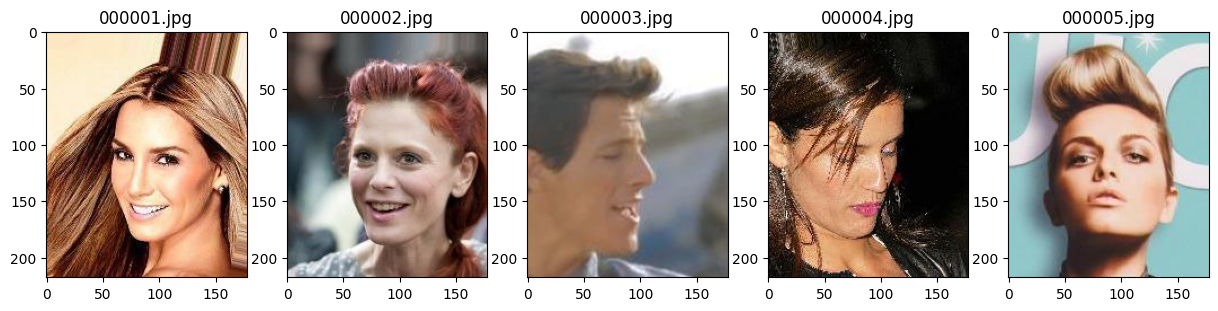

In [34]:
images_names = os.listdir('./celebA_train_500/celebA_imgs/')[:5]
show_imgs(images_names)

### Train Neural Network

Давайте создадим наборы данных и сеть, используя эти изображения:

In [35]:
transform_train = transforms.Compose([
      # трансформируем наши фото для обучения
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      # transforms.Resize(size=(224, 224)),
      transforms.Resize(size=(300, 300)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      # трансформируем наши фото для валидации
      transforms.CenterCrop(size=120),
      # transforms.Resize(size=(224, 224)),
      transforms.Resize(size=(300, 300)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data = celebADataset('train', transform_train)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

# зададим размер банча и сделаем даталоадеры
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


**Рабочий процесс**: обучим модель на train_data, используя val_data для проверки. Используем стандартную функцию потерь CE. Рассчитаем потери и точность на тестовом наборе после обучения.

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [37]:
!nvidia-smi
torch.cuda.is_available()

Mon Jun 10 11:55:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   39C    P0             30W /  125W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

True

In [44]:
model = timm.create_model('efficientnet_b3a', pretrained=True)
# model = timm.create_model('resnet50', pretrained=True)
model

EfficientNet(
  (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNormAct2d(
          40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
    

In [45]:
person = pd.read_csv('celebA_train_500/celebA_anno.txt', sep = ' ', names = ['file', 'label'])

In [46]:
n_classes = len(person['label'].unique())

In [47]:
clear_ram()

Не ставлю задачей получения максимального скора, поэтому меняю модель на менее требовательную

In [48]:
classifier = model.classifier
model.classifier = nn.Sequential(
    nn.Linear(1536, 1000),
    nn.BatchNorm1d(1000),
    nn.Linear(1000, n_classes))
# model.fc = nn.Sequential(
#     nn.Linear(2048, 1000),
#     nn.BatchNorm1d(1000),
#     nn.Linear(1000, n_classes)
# )
model.to(device)
print("we will classify :{}".format(n_classes))
print(model)

we will classify :500
EfficientNet(
  (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNormAct2d(
          40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2)

In [49]:
clear_ram()

In [50]:
optimizer = Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [164]:
model, history = train(
    train_loader,
    val_loader,
    model = model,
    epochs = 50,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = nn.CrossEntropyLoss()
)

epoch:   0%|                                                                                    | 0/50 [00:00<?, ?it/s]

loss 4.133458651853411


epoch:   2%|█▍                                                                       | 1/50 [01:43<1:24:31, 103.49s/it]


Epoch 001 train_loss: 4.1335     val_loss 2.4750 train_acc 0.2097 val_acc 0.4510
loss 1.2971132913332306


epoch:   4%|██▉                                                                      | 2/50 [03:27<1:22:56, 103.69s/it]


Epoch 002 train_loss: 1.2971     val_loss 1.7682 train_acc 0.6939 val_acc 0.5873
loss 0.4055679807725471


epoch:   6%|████▍                                                                    | 3/50 [05:12<1:21:48, 104.45s/it]


Epoch 003 train_loss: 0.4056     val_loss 1.2489 train_acc 0.8985 val_acc 0.7157
loss 0.18259677098373348


epoch:   8%|█████▊                                                                   | 4/50 [06:57<1:20:11, 104.59s/it]


Epoch 004 train_loss: 0.1826     val_loss 1.2926 train_acc 0.9569 val_acc 0.7077
loss 0.14623368544720308


epoch:  10%|███████▎                                                                 | 5/50 [08:41<1:18:23, 104.52s/it]


Epoch 005 train_loss: 0.1462     val_loss 1.5462 train_acc 0.9613 val_acc 0.6842
loss 0.37826895228262697


epoch:  12%|████████▊                                                                | 6/50 [10:26<1:16:46, 104.69s/it]


Epoch 006 train_loss: 0.3783     val_loss 2.0912 train_acc 0.8943 val_acc 0.5879
loss 0.45842085708951236


epoch:  14%|██████████▏                                                              | 7/50 [12:11<1:15:06, 104.81s/it]


Epoch 007 train_loss: 0.4584     val_loss 1.6961 train_acc 0.8711 val_acc 0.6715
loss 0.2690248918695173


epoch:  16%|███████████▋                                                             | 8/50 [13:56<1:13:24, 104.86s/it]


Epoch 008 train_loss: 0.2690     val_loss 1.4129 train_acc 0.9230 val_acc 0.7194
loss 0.16085861044437083


epoch:  18%|█████████████▏                                                           | 9/50 [15:41<1:11:31, 104.68s/it]


Epoch 009 train_loss: 0.1609     val_loss 1.2869 train_acc 0.9517 val_acc 0.7508
loss 0.09201552265512056


epoch:  20%|██████████████▍                                                         | 10/50 [17:25<1:09:46, 104.67s/it]


Epoch 010 train_loss: 0.0920     val_loss 1.4151 train_acc 0.9743 val_acc 0.7401
loss 0.15098573732597942


epoch:  22%|███████████████▊                                                        | 11/50 [19:10<1:08:06, 104.79s/it]


Epoch 011 train_loss: 0.1510     val_loss 1.7783 train_acc 0.9559 val_acc 0.6874
loss 0.26496390559909383


epoch:  24%|█████████████████▎                                                      | 12/50 [20:55<1:06:21, 104.78s/it]


Epoch 012 train_loss: 0.2650     val_loss 1.9550 train_acc 0.9240 val_acc 0.6544
loss 0.28611172465014545


epoch:  26%|██████████████████▋                                                     | 13/50 [22:40<1:04:36, 104.77s/it]


Epoch 013 train_loss: 0.2861     val_loss 1.8979 train_acc 0.9213 val_acc 0.6832
loss 0.17496631368436616


epoch:  28%|████████████████████▏                                                   | 14/50 [24:25<1:02:50, 104.73s/it]


Epoch 014 train_loss: 0.1750     val_loss 1.5273 train_acc 0.9474 val_acc 0.7460
loss 0.09272782660956226


epoch:  30%|█████████████████████▌                                                  | 15/50 [26:09<1:01:05, 104.74s/it]


Epoch 015 train_loss: 0.0927     val_loss 1.3337 train_acc 0.9719 val_acc 0.7694
loss 0.10313281167581091


epoch:  32%|███████████████████████▋                                                  | 16/50 [27:54<59:20, 104.73s/it]


Epoch 016 train_loss: 0.1031     val_loss 1.5524 train_acc 0.9716 val_acc 0.7401
loss 0.13698113879209825


epoch:  34%|█████████████████████████▏                                                | 17/50 [29:39<57:41, 104.88s/it]


Epoch 017 train_loss: 0.1370     val_loss 1.7341 train_acc 0.9581 val_acc 0.7183
loss 0.1543691891039746


epoch:  36%|██████████████████████████▋                                               | 18/50 [31:24<55:56, 104.88s/it]


Epoch 018 train_loss: 0.1544     val_loss 1.9393 train_acc 0.9569 val_acc 0.7146
loss 0.18801883978626172


epoch:  38%|████████████████████████████                                              | 19/50 [33:09<54:12, 104.93s/it]


Epoch 019 train_loss: 0.1880     val_loss 1.8177 train_acc 0.9449 val_acc 0.7236
loss 0.19805499833000453


epoch:  40%|█████████████████████████████▌                                            | 20/50 [34:54<52:28, 104.97s/it]


Epoch 020 train_loss: 0.1981     val_loss 1.6639 train_acc 0.9456 val_acc 0.7396
loss 0.12881389167748414


epoch:  42%|███████████████████████████████                                           | 21/50 [36:39<50:43, 104.96s/it]


Epoch 021 train_loss: 0.1288     val_loss 1.6083 train_acc 0.9621 val_acc 0.7529
loss 0.09943981825924314


epoch:  44%|████████████████████████████████▌                                         | 22/50 [38:24<49:00, 105.01s/it]


Epoch 022 train_loss: 0.0994     val_loss 1.7088 train_acc 0.9698 val_acc 0.7417
loss 0.11384431183351681


epoch:  46%|██████████████████████████████████                                        | 23/50 [40:10<47:16, 105.07s/it]


Epoch 023 train_loss: 0.1138     val_loss 1.6818 train_acc 0.9692 val_acc 0.7487
loss 0.11815993846629569


epoch:  48%|███████████████████████████████████▌                                      | 24/50 [41:55<45:32, 105.11s/it]


Epoch 024 train_loss: 0.1182     val_loss 1.6906 train_acc 0.9678 val_acc 0.7487
loss 0.11656668257754826


epoch:  50%|█████████████████████████████████████                                     | 25/50 [43:39<43:43, 104.95s/it]


Epoch 025 train_loss: 0.1166     val_loss 1.6273 train_acc 0.9684 val_acc 0.7529
loss 0.142443403393832


epoch:  52%|██████████████████████████████████████▍                                   | 26/50 [45:23<41:51, 104.65s/it]


Epoch 026 train_loss: 0.1424     val_loss 1.8615 train_acc 0.9609 val_acc 0.7338
loss 0.14392426574021955


epoch:  54%|███████████████████████████████████████▉                                  | 27/50 [47:07<40:03, 104.51s/it]


Epoch 027 train_loss: 0.1439     val_loss 1.6258 train_acc 0.9573 val_acc 0.7806
loss 0.08446439857364019


epoch:  56%|█████████████████████████████████████████▍                                | 28/50 [48:52<38:21, 104.60s/it]


Epoch 028 train_loss: 0.0845     val_loss 1.5508 train_acc 0.9750 val_acc 0.7796
loss 0.110356788390337


epoch:  58%|██████████████████████████████████████████▉                               | 29/50 [50:36<36:33, 104.47s/it]


Epoch 029 train_loss: 0.1104     val_loss 1.7100 train_acc 0.9702 val_acc 0.7513
loss 0.12961229715563446


epoch:  60%|████████████████████████████████████████████▍                             | 30/50 [52:21<34:48, 104.41s/it]


Epoch 030 train_loss: 0.1296     val_loss 1.7755 train_acc 0.9643 val_acc 0.7556
loss 0.10136977216091063


epoch:  62%|█████████████████████████████████████████████▉                            | 31/50 [54:04<32:59, 104.19s/it]


Epoch 031 train_loss: 0.1014     val_loss 1.7390 train_acc 0.9735 val_acc 0.7614
loss 0.08805841195955393


epoch:  64%|███████████████████████████████████████████████▎                          | 32/50 [55:49<31:15, 104.19s/it]


Epoch 032 train_loss: 0.0881     val_loss 1.7720 train_acc 0.9755 val_acc 0.7583
loss 0.08012668445792698


epoch:  66%|████████████████████████████████████████████████▊                         | 33/50 [57:32<29:26, 103.94s/it]


Epoch 033 train_loss: 0.0801     val_loss 1.6365 train_acc 0.9799 val_acc 0.7764
loss 0.0774022126652505


epoch:  68%|██████████████████████████████████████████████████▎                       | 34/50 [59:15<27:40, 103.78s/it]


Epoch 034 train_loss: 0.0774     val_loss 1.7139 train_acc 0.9792 val_acc 0.7668
loss 0.07487285780272383


epoch:  70%|██████████████████████████████████████████████████▍                     | 35/50 [1:00:59<25:56, 103.79s/it]


Epoch 035 train_loss: 0.0749     val_loss 1.7183 train_acc 0.9810 val_acc 0.7700
loss 0.11382886346711686


epoch:  72%|███████████████████████████████████████████████████▊                    | 36/50 [1:02:43<24:13, 103.83s/it]


Epoch 036 train_loss: 0.1138     val_loss 1.8595 train_acc 0.9717 val_acc 0.7487
loss 0.09081446951610785


epoch:  74%|█████████████████████████████████████████████████████▎                  | 37/50 [1:04:27<22:30, 103.90s/it]


Epoch 037 train_loss: 0.0908     val_loss 1.7453 train_acc 0.9771 val_acc 0.7614
loss 0.10785347900636726


epoch:  76%|██████████████████████████████████████████████████████▋                 | 38/50 [1:06:11<20:47, 104.00s/it]


Epoch 038 train_loss: 0.1079     val_loss 1.8981 train_acc 0.9704 val_acc 0.7465
loss 0.09658593141021685


epoch:  78%|████████████████████████████████████████████████████████▏               | 39/50 [1:07:56<19:05, 104.12s/it]


Epoch 039 train_loss: 0.0966     val_loss 1.8789 train_acc 0.9755 val_acc 0.7471
loss 0.08697888309693093


epoch:  80%|█████████████████████████████████████████████████████████▌              | 40/50 [1:09:39<17:19, 103.98s/it]


Epoch 040 train_loss: 0.0870     val_loss 1.6666 train_acc 0.9757 val_acc 0.7716
loss 0.06281660414929371


epoch:  82%|███████████████████████████████████████████████████████████             | 41/50 [1:11:23<15:35, 103.94s/it]


Epoch 041 train_loss: 0.0628     val_loss 1.5800 train_acc 0.9813 val_acc 0.7897
loss 0.06892110035391597


epoch:  84%|████████████████████████████████████████████████████████████▍           | 42/50 [1:13:08<13:52, 104.11s/it]


Epoch 042 train_loss: 0.0689     val_loss 1.7134 train_acc 0.9812 val_acc 0.7796
loss 0.07360436081595689


epoch:  86%|█████████████████████████████████████████████████████████████▉          | 43/50 [1:14:52<12:09, 104.17s/it]


Epoch 043 train_loss: 0.0736     val_loss 1.7420 train_acc 0.9787 val_acc 0.7678
loss 0.10685679613145405


epoch:  88%|███████████████████████████████████████████████████████████████▎        | 44/50 [1:16:36<10:24, 104.13s/it]


Epoch 044 train_loss: 0.1069     val_loss 1.6989 train_acc 0.9733 val_acc 0.7726
loss 0.07401500503844924


epoch:  90%|████████████████████████████████████████████████████████████████▊       | 45/50 [1:18:20<08:40, 104.10s/it]


Epoch 045 train_loss: 0.0740     val_loss 1.7390 train_acc 0.9795 val_acc 0.7758
loss 0.06154326450286567


epoch:  92%|██████████████████████████████████████████████████████████████████▏     | 46/50 [1:20:04<06:56, 104.18s/it]


Epoch 046 train_loss: 0.0615     val_loss 1.6672 train_acc 0.9828 val_acc 0.7780
loss 0.05497004408284006


epoch:  94%|███████████████████████████████████████████████████████████████████▋    | 47/50 [1:21:49<05:12, 104.21s/it]


Epoch 047 train_loss: 0.0550     val_loss 1.8013 train_acc 0.9846 val_acc 0.7726
loss 0.08491737835341628


epoch:  96%|█████████████████████████████████████████████████████████████████████   | 48/50 [1:23:33<03:28, 104.27s/it]


Epoch 048 train_loss: 0.0849     val_loss 1.7574 train_acc 0.9772 val_acc 0.7705
loss 0.08456142775336484


epoch:  98%|██████████████████████████████████████████████████████████████████████▌ | 49/50 [1:25:17<01:44, 104.16s/it]


Epoch 049 train_loss: 0.0846     val_loss 1.7324 train_acc 0.9778 val_acc 0.7774
loss 0.08297743084906696


epoch: 100%|████████████████████████████████████████████████████████████████████████| 50/50 [1:27:01<00:00, 104.44s/it]


Epoch 050 train_loss: 0.0830     val_loss 1.7960 train_acc 0.9765 val_acc 0.7684
Best val Acc: 0.789670


In [272]:
results = pd.DataFrame({'model': ['CE_50'], 'train_accuracy': [0.789670]})
results

,model,train_accuracy
0,CE_50,0.78967


In [165]:
torch.save(model.state_dict(), 'model_CE_50.pth')

In [51]:
model.to(device)
model.load_state_dict(torch.load('model_CE_50.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [167]:
epoch, loss, acc, val_loss, val_acc = zip(*history)

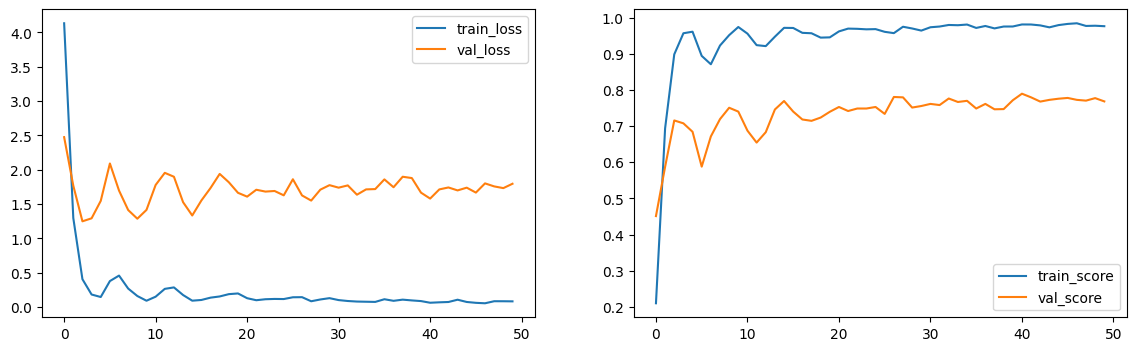

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

На efficientnet_b3a с размером картинок 300х300, размером батча 64 и 50 эпохами вытягивала на 0,8684707, если увиличить число эпох обучения при этом же размере батча, возможно скорее всего прийти к этим же параметрам, но не суть, важна чистота эксперимента...:)

Код для оценки модели (вы можете изменить его, если хотите):

In [169]:
test_accuracy, test_loss = evaluate(model, test_loader, nn.CrossEntropyLoss())
test_accuracy, test_loss

Test images: 50it [00:09,  5.15it/s]


(array(0.7872876, dtype=float32), 1.7781472943723202)

In [273]:
results['test_accuracy'] = float(test_accuracy)
results

,model,train_accuracy,test_accuracy
0,CE_50,0.78967,0.787288


Как можно заметить модель адекватно реагирует на обучение и не обучается. Для получения более высокого скора возможно перейти к более тяжелой модели.

**Вычисление косинусного сходства**: удалим последний слой обученной сети. Получим эмбеддинги для некоторых изображений из train и для изображений из test. Вычислим косинусное сходство между эмбеддингами, соответствующими изображениям одного и того же человека и разных людей.

Отбросим у нашей сетки последний слой

In [52]:
classifier = model.classifier
# model.classifier = nn.Sequential(
#     nn.Linear(1536, 1000),
#     nn.BatchNorm1d(1000))
model.classifier = nn.Linear(1536, 1000)
# model.fc = nn.Sequential(
#     nn.Linear(2048, 1000),
#     nn.BatchNorm1d(1000)
# )
model.to(device)
print("we will classify :{}".format(n_classes))
print(model)

we will classify :500
EfficientNet(
  (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNormAct2d(
          40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2)

In [53]:
clear_ram()

Сделаем себе словарик с метками и именами файлов картинок

In [39]:
test_class_idx_map = defaultdict(list)
for i, batch in enumerate(test_data):
    X_batch, y_batch = batch['image'], batch['label']
    test_class_idx_map[y_batch].append(i)
    
train_class_idx_map = defaultdict(list)
for i, batch in enumerate(train_data):
    X_batch, y_batch = batch['image'], batch['label']
    train_class_idx_map[y_batch].append(i)

Посчитаем влет косинусные расстояния для фото одного человека и разных людей

In [54]:
test_embs = 0
train_embs = 0
train_embs_cache = {}
same_persons = torch.FloatTensor([0])
diff_persons = torch.FloatTensor([0])

for test_cl, test_idxs in tqdm(test_class_idx_map.items(), desc='Test images'):

    imgs = torch.vstack([test_data[i]['image'][None, :] for i in test_idxs])
    test_embs = get_embeddings(model, imgs)
        
    for train_cl, train_idxs in train_class_idx_map.items():

        if train_cl in train_embs_cache:
            train_embs = train_embs_cache[train_cl]
        else:
            imgs = torch.vstack([train_data[i]['image'][None, :] for i in train_idxs])
            train_embs = get_embeddings(model, imgs)
            train_embs_cache[train_cl] = train_embs
        
        pcs = pairwise_cosine_similarity(test_embs, train_embs).flatten()
        if train_cl == test_cl:
            same_persons = torch.hstack((same_persons, pcs))
        else:
            diff_persons = torch.hstack((diff_persons, pcs))

Test images: 100%|███████████████████████████████████████████████████████████████████| 491/491 [04:12<00:00,  1.95it/s]


Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|                                     | 0/500 [00:00<?, ?it/s]
                                                                                
Train images:   0%|         

In [175]:
with open('same_persons', 'wb') as f:
    pickle.dump(same_persons, f)
with open('diff_persons', 'wb') as f:
    pickle.dump(diff_persons, f)

In [176]:
with open('same_persons', 'rb') as f:
    same_persons = pickle.load(f)
with open('diff_persons', 'rb') as f:
    diff_persons = pickle.load(f)

In [177]:
# Посмотрим, что у нас получилось для одного человека
same_persons

tensor([0.0000, 0.7402, 0.6824, 0.3215, 0.4560, 0.7158, 0.5503, 0.7486, 0.6408,
        0.5953, 0.7150, 0.6842, 0.6695, 0.6250, 0.5642, 0.7410, 0.7582, 0.4744,
        0.6783, 0.7109, 0.5191, 0.4996, 0.4015, 0.5344, 0.7798, 0.3654, 0.4593,
        0.4583, 0.6980, 0.6024, 0.6237, 0.6432, 0.7391, 0.6972, 0.5363, 0.5972,
        0.4271, 0.8802, 0.3797, 0.7370, 0.5826, 0.6386, 0.7251, 0.4957, 0.6246,
        0.6615, 0.7906, 0.3814, 0.6175, 0.9104, 0.6048, 0.7293, 0.5158, 0.6418,
        0.3447, 0.3284, 0.6880, 0.5230, 0.5761, 0.5439, 0.8067, 0.5881, 0.5540,
        0.5475, 0.5824, 0.4886, 0.6443, 0.6302, 0.7195, 0.5233, 0.6927, 0.6667,
        0.1513, 0.5094, 0.6752, 0.5477, 0.4603, 0.7858, 0.6618, 0.8211, 0.7569,
        0.5054, 0.6618, 0.7823, 0.5410, 0.4891, 0.7770, 0.4016, 0.7044, 0.6698,
        0.5157, 0.7859, 0.4823, 0.6675, 0.4558, 0.4933, 0.6526, 0.6371, 0.6770,
        0.6642, 0.6140, 0.6859, 0.4120, 0.8034, 0.6753, 0.7099, 0.6851, 0.4973,
        0.5958, 0.5525, 0.5545, 0.5865, 

In [178]:
# Для разных людей
diff_persons

tensor([0.0000, 0.3205, 0.2945,  ..., 0.3476, 0.3651, 0.1794])

In [179]:
# вот так нагляднее
same_persons = same_persons[1:]
diff_persons = diff_persons[1:]

In [180]:
same_persons

tensor([0.7402, 0.6824, 0.3215, 0.4560, 0.7158, 0.5503, 0.7486, 0.6408, 0.5953,
        0.7150, 0.6842, 0.6695, 0.6250, 0.5642, 0.7410, 0.7582, 0.4744, 0.6783,
        0.7109, 0.5191, 0.4996, 0.4015, 0.5344, 0.7798, 0.3654, 0.4593, 0.4583,
        0.6980, 0.6024, 0.6237, 0.6432, 0.7391, 0.6972, 0.5363, 0.5972, 0.4271,
        0.8802, 0.3797, 0.7370, 0.5826, 0.6386, 0.7251, 0.4957, 0.6246, 0.6615,
        0.7906, 0.3814, 0.6175, 0.9104, 0.6048, 0.7293, 0.5158, 0.6418, 0.3447,
        0.3284, 0.6880, 0.5230, 0.5761, 0.5439, 0.8067, 0.5881, 0.5540, 0.5475,
        0.5824, 0.4886, 0.6443, 0.6302, 0.7195, 0.5233, 0.6927, 0.6667, 0.1513,
        0.5094, 0.6752, 0.5477, 0.4603, 0.7858, 0.6618, 0.8211, 0.7569, 0.5054,
        0.6618, 0.7823, 0.5410, 0.4891, 0.7770, 0.4016, 0.7044, 0.6698, 0.5157,
        0.7859, 0.4823, 0.6675, 0.4558, 0.4933, 0.6526, 0.6371, 0.6770, 0.6642,
        0.6140, 0.6859, 0.4120, 0.8034, 0.6753, 0.7099, 0.6851, 0.4973, 0.5958,
        0.5525, 0.5545, 0.5865, 0.5861, 

In [181]:
np.array(same_persons).mean()

0.61822397

С фото одинаковйх людей косинусное подобие в среднем 0.61822397

In [182]:
diff_persons

tensor([0.3205, 0.2945, 0.4302,  ..., 0.3476, 0.3651, 0.1794])

In [183]:
np.array(diff_persons).mean()

0.374767

С фотографиями разных людей оно в среднем 0.374767

**Cosine similarity distribution**: рассчитаем все косинусные сходства между изображениями в test dataset и train dataset одного и того же человека. Это означает, что если у нас есть изображение человека #106 из test dataset, необходимо рассчитать все сходства между эмбеддингами этого человека из test dataset и эмбеддингами этого человека из train dataset. 

Затем также сделаем это для пар разных людей. Это означает, что если у вас есть изображение человека #106 из test dataset, необходимо рассчитать все сходства между эмбеддингами этого человека из test dataset и эмбеддингами отличного от него человека из train dataset.

Визуализируем (построим гистограммы) распределения косинусного сходства для одних и тех же и разных людей.

Этот расчет может занять много времени и памяти, так как это много пар. Мы сократим количество пар, между которыми рассчитаем расстояния до 1000.

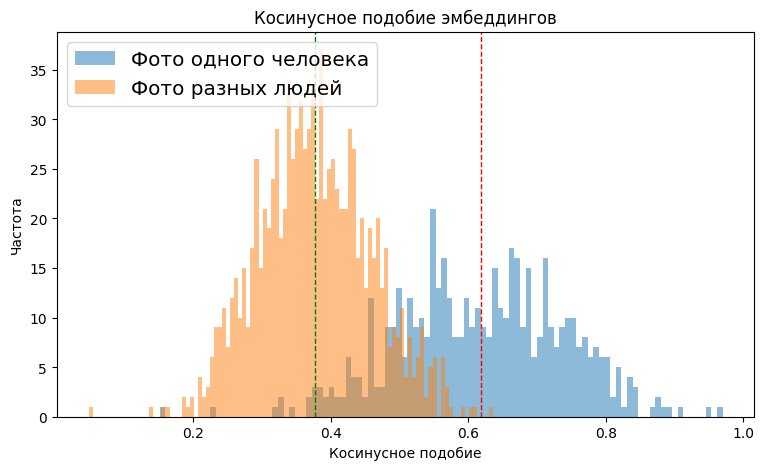

In [184]:
plt.figure (figsize = [9, 5])
    
plt.hist (np.array(same_persons)[:1000], bins=100, label = 'Фото одного человека', alpha=.5)
plt.hist (np.array(diff_persons)[:1000], bins=100, label = 'Фото разных людей', alpha=.5)

plt.axvline(np.array(same_persons)[:1000].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(np.array(diff_persons)[:1000].mean(), color='g', linestyle='dashed', linewidth=1)


plt.xlabel ('Косинусное подобие')
plt.ylabel ('Частота')

plt.legend (loc = 'upper left', fontsize = 'x-large')

plt.title ('Косинусное подобие эмбеддингов')
plt.show ()

На гистограммах видим, что распределения косинусного подобия фотографий для одного человека и для нескольких близки к нормальным. Отмечается среднее по распределению у разных людей ближе к 0.374767, а у одного человека к 0.61822397

## Часть 2: Identificaton rate metric

При обучении приведенной выше модели мы использовали потери CE на val and test датасетах в качестве меры производительности нашей модели. Но у этого есть большой недостаток: мы не можем измерить, как модель будет работать на невидимых лицах (которые не присутствовали в train, val и test датасетах)

Чтобы решить эту проблему, мы можем рассчитать другую метрику для модели: **identification rate**. Вот как это работает:

У нас есть два датасета с лицами: query and distractors. Ни одно из них не было в train, val или test датасетах.

1. расчитаем cosine similarities между всеми лицами соответствующим одному человеку из query dataset. Это означает, что если у нас есть 3 фото из query части: 01.jpg, 02.jpg, 03.jpg, мы расчитаем 3 cosine similarities между всеми эмбеддингами этих фото. 
2. расчитаем cosine similarities между всеми эмбеддингами разных людей из query dataset. 
3. расчитаем cosine similarities между всеми парами эмбеддингов, соответствующих query and distractors. Это означает, что нам необходимо посчитать подобия между (q, d), где q это эмбеддинг из query, d — эмбеддинг из distractors. Нам надо |query|*|distractors| подобие.
4. Просуммируем число подобий из 2 и 3 пунктов. Это будет числом false pairs.
5. посчитаем **FPR** (false positive rate). Пусть будет равен 0.01 в нашем случае. FPR, умноженный на количество false pairs из пункта 4 это число - false positives, которое мы позволяем нашей модели для ложных срабатываний. Назовем это числом N
6. Отсортируем все подобия из false pairs по возрастанию. Возьмем N-ый элемент с начала — это наш **threshold similarity**.
7. Посчитаем сколько положительных срабатываний из пункта 1 превышает threshold. Разделим это число на число положительных подобий из пункта 1. Это - TPR (true positive rate) — наша метрика.

Этот показатель также может быть выражен как TPR@FPR=0.01. FPR может быть установлен разным. 

Данные (query photos, query labels & distructors photos) можно загрузить отсюда:

In [185]:
# ! curl -L $(yadisk-direct https://disk.yandex.com/d/KN4EEkNKrF_ZXQ) -o celebA_ir.zip
# ! unzip -qq celebA_ir.zip

**Пример**: внедрим метрику TPR@FPR. Посчтитаем ее для нашей модели на test датасете при FPR=[0.5, 0.2, 0.1, 0.05].

In [55]:
# Файл с аннотациями части запроса: какое изображение к какому классу принадлежит
# формат: 
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
f = open('./celebA_ir/celebA_anno_query.csv', 'r')
query_lines = f.readlines()[1:]
f.close()
query_lines = [x.strip().split(',') for x in query_lines]
# Простой список названий изображений из запроса. Необходимо вычислить вложения для запроса
query_img_names = [x[0] for x in query_lines]

# Словарь с информацией о том, какие изображения из запроса относятся к какому классу
# формат:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
    query_dict[img_class].append(img_name)

# Список изображений диктатора
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors') 

In [56]:
# train_dict, train_img_names = type_embeddings('train')
# with open('train_dict.pkl', 'wb') as f:
#     pickle.dump(train_dict, f)
# with open("train_img_names", 'wb') as f:   #Pickling
#     pickle.dump(train_img_names, f)

# val_dict, val_img_names = type_embeddings('val')
# with open('val_dict.pkl', 'wb') as f:
#     pickle.dump(val_dict, f)
# with open("val_img_names", 'wb') as f:   #Pickling
#     pickle.dump(val_img_names, f)
    
test_dict, test_img_names = type_embeddings('test')

In [57]:
with open('test_dict.pkl', 'wb') as f:
    pickle.dump(test_dict, f)
with open("test_img_names", 'wb') as f:   #Pickling
    pickle.dump(test_img_names, f)

In [58]:
# with open('train_dict.pkl', 'rb') as f:
#     train_dict = pickle.load(f)
# with open('train_img_names', 'rb') as f:
#     train_img_names = pickle.load(f)
    
# with open('val_dict.pkl', 'rb') as f:
#     val_dict = pickle.load(f)
# with open('val_img_names', 'rb') as f:
#     val_img_names = pickle.load(f)
    
with open('test_dict.pkl', 'rb') as f:
    test_dict = pickle.load(f)
with open('test_img_names', 'rb') as f:
    test_img_names = pickle.load(f)

In [59]:
clear_ram()

In [60]:
path = './celebA_train_500/celebA_imgs/'
# # test_embeddings = compute_embeddings_test(model, test_img_names[:5])
test_embeddings = compute_embeddings(model, test_img_names, path)
with open("test_embeddings", 'wb') as f:   #Pickling
    pickle.dump(test_embeddings, f)
    
# torch.cuda.empty_cache()
# gc.collect()

# val_embeddings = compute_embeddings(model, val_img_names, path)
# with open("val_embeddings", 'wb') as f:   #Pickling
#     pickle.dump(val_embeddings, f)
    
# torch.cuda.empty_cache()
# gc.collect()

# train_embeddings = compute_embeddings(model, train_img_names, path)
# with open("train_embeddings", 'wb') as f:   #Pickling
#     pickle.dump(train_embeddings, f)

Get embeddings: 50it [00:04, 10.81it/s]


In [61]:
clear_ram()

In [62]:
with open('test_embeddings', 'rb') as f:
    test_embeddings = pickle.load(f)
# with open('val_embeddings', 'rb') as f:
#     val_embeddings = pickle.load(f)
# with open('train_embeddings', 'rb') as f:
#     train_embeddings = pickle.load(f)

In [63]:
path = './celebA_ir/celebA_query/'
query_embeddings = compute_embeddings(model, query_img_names, path)

torch.cuda.empty_cache()
gc.collect()

path = './celebA_ir/celebA_distractors/'
distractors_embeddings = compute_embeddings(model, distractors_img_names, path)

clear_ram()

Get embeddings: 39it [00:03, 11.20it/s]
Get embeddings: 63it [00:05, 11.39it/s]


In [64]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, 
                                            query_embeddings)
with open("cosine_query_pos", 'wb') as f:
    pickle.dump(cosine_query_pos, f)

Progress: 100%|████████████████████████████████████████████████████████████████████████| 51/51 [00:03<00:00, 16.70it/s]


distractors_embeddings:  17%|██▎           | 332/2001 [00:00<00:00, 3319.01it/s]


distractors_embeddings:  83%|██████████▊  | 1660/2001 [00:00<00:00, 2787.06it/s]


distractors_embeddings:  14%|█▉            | 276/2001 [00:00<00:00, 2758.19it/s]


distractors_embeddings:  18%|██▌           | 370/2001 [00:00<00:00, 3692.78it/s]


query_embeddings:  22%|████▊                 | 267/1222 [02:39<08:44,  1.82it/s]


distractors_embeddings:  54%|███████      | 1088/2001 [00:00<00:00, 3565.05it/s]


distractors_embeddings:  19%|██▌           | 372/2001 [00:00<00:00, 3715.57it/s]


query_embeddings:  29%|██████▎               | 350/1222 [03:26<08:01,  1.81it/s]


distractors_embeddings:  74%|█████████▋   | 1484/2001 [00:00<00:00, 3667.45it/s]


distractors_embeddings:  38%|█████▎        | 756/2001 [00:00<00:00, 3715.21it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  90%|███████████▋ | 1807/2001 [00:00<00:00, 2991.80it/s]


distractors_embeddings:  53%|██████▊      | 1054/2001 [00:00<00:00, 3501.75it/s]


distractors_embeddings:  37%|█████▏        | 742/2001 [00:00<00:00, 3551.87it/s]


distractors_embeddings:  69%|████████▉    | 1385/2001 [00:00<00:00, 3471.35it/s]


distractors_embeddings:  83%|██████████▊  | 1668/2001 [00:00<00:00, 2804.32it/s]


distractors_embeddings:  86%|███████████▏ | 1715/2001 [00:00<00:00, 3441.85it/s]


distractors_embeddings:  18%|██▌           | 360/2001 [00:00<00:00, 3594.13it/s]


distractors_embeddings:  18%|██▍           | 357/2001 [00:00<00:00, 3560.49it/s]


query_embeddings:  55%|████████████          | 670/1222 [06:39<05:29,  1.67it/s]


distractors_embeddings:  85%|███████████  | 1699/2001 [00:00<00:00, 2824.75it/s]


distractors_embeddings:  71%|█████████▏   | 1414/2001 [00:00<00:00, 3515.09it/s]


distractors_embeddings:  41%|█████▋        | 820/2001 [00:00<00:00, 2629.23it/s]


distractors_embeddings:  54%|███████      | 1080/2001 [00:00<00:00, 3529.62it/s]


distractors_embeddings:  13%|█▊            | 257/2001 [00:00<00:00, 2569.71it/s]


distractors_embeddings:  54%|███████      | 1085/2001 [00:00<00:00, 3501.53it/s]


distractors_embeddings:  72%|█████████▎   | 1437/2001 [00:00<00:00, 3487.19it/s]


distractors_embeddings:  18%|██▍           | 352/2001 [00:00<00:00, 3512.78it/s]


distractors_embeddings:  75%|█████████▋   | 1493/2001 [00:00<00:00, 3165.26it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  36%|█████         | 724/2001 [00:00<00:00, 3527.13it/s]


distractors_embeddings:  90%|███████████▊ | 1809/2001 [00:00<00:00, 3180.16it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


distractors_embeddings:  14%|█▉            | 277/2001 [00:00<00:00, 2764.05it/s]


query_embeddings:  87%|██████████████████▎  | 1063/1222 [10:47<01:34,  1.68it/s]


distractors_embeddings:  18%|██▌           | 360/2001 [00:00<00:00, 3595.95it/s]


distractors_embeddings:  73%|█████████▍   | 1452/2001 [00:00<00:00, 3399.85it/s]


distractors_embeddings:  74%|█████████▋   | 1487/2001 [00:00<00:00, 3625.26it/s]


distractors_embeddings:   0%|                          | 0/2001 [00:00<?, ?it/s]


query_embeddings:  98%|████████████████████▌| 1197/1222 [12:07<00:15,  1.58it/s]


query_embeddings: 100%|█████████████████████| 1222/1222 [12:23<00:00,  1.64it/s]


In [65]:
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, 
                                            query_embeddings)
with open("cosine_query_neg", 'wb') as f:
    pickle.dump(cosine_query_neg, f)

Subset: 100%|██████████████████████████████████████████████████████████████████████| 1275/1275 [02:33<00:00,  8.32it/s]


In [66]:
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, 
                                                            distractors_embeddings)
with open("cosine_query_distractors", 'wb') as f:
    pickle.dump(cosine_query_distractors, f)

query_embeddings: 100%|████████████████████████████████████████████████████████████| 1222/1222 [07:28<00:00,  2.72it/s]


In [67]:
with open('cosine_query_pos', 'rb') as f:
    cosine_query_pos = pickle.load(f)
with open('cosine_query_neg', 'rb') as f:
    cosine_query_neg = pickle.load(f)
with open('cosine_query_distractors', 'rb') as f:
    cosine_query_distractors = pickle.load(f)

Проверим себя:

In [214]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
test_query_embeddings = [
                    [1.56, 6.45,  -7.68],
                    [-1.1 , 6.11,  -3.0],
                    [-0.06,-0.98,-1.29],
                    [8.56, 1.45,  1.11],
                    [0.7,  1.1,   -7.56],
                    [0.05, 0.9,   -2.56],
]

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = [
                    [0.12, -3.23, -5.55],
                    [-1,   -0.01, 1.22],
                    [0.06, -0.23, 1.34],
                    [-6.6, 1.45,  -1.45],
                    [0.89,  1.98, 1.45],
]

test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings, 
                                                            test_distractors_embeddings)

query_embeddings: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 6004.73it/s]


In [215]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"

true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"

true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042,-0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

В итоге:: identification rate calculation

Проверка:

In [216]:
test_thr = []
test_tpr = []
for fpr in [0.5, 0.3, 0.1]:
    x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg, 
                    test_cosine_query_distractors, fpr=fpr)
    test_thr.append(x)
    test_tpr.append(y)

In [217]:
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(true_tpr)), "A mistake in computing tpr"

В итоге, посчитаем tpr для лиц из query и distractors датасетов при fpr = [0.5, 0.2, 0.1, 0.05]:

In [218]:
thr = []
tpr = []
for fpr in [0.5, 0.2, 0.1, 0.05]:
    x, y = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr=fpr)
    thr.append(x)
    tpr.append(y)

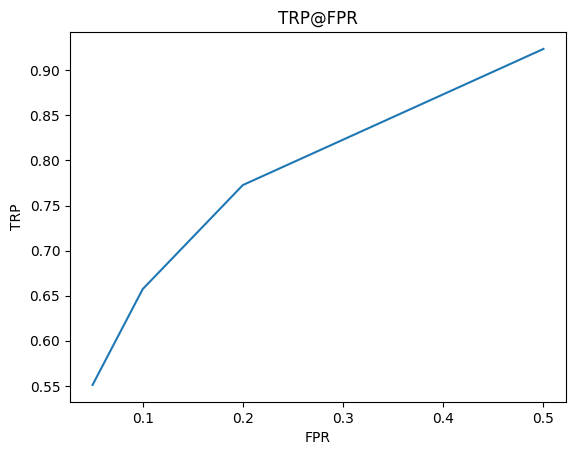

In [219]:
fpr = [0.5, 0.2, 0.1, 0.05]
plt.plot(fpr, tpr)

plt.xlabel ('FPR')
plt.ylabel ('TRP')

plt.title ('TRP@FPR')
plt.show ()

Ну так себе...

## Часть 3: Loss functions

При построении сети на примере 1 мы использовали обычные потери CE. Но есть еще много вариантов функций потерь, которые можно использовать для обучения нейронной сети. Мы обсудим два из них, которые являются наиболее популярными. Больше примеров потерь для распознавания лиц и обзоры их производительности вы можете найти в этой статье:https://arxiv.org/pdf/1901.05903.pdf

### TripletLoss

Это еще один вид потерь, который не требует наличия у модели последнего слоя классификации — он работает напрямую с эмбеддингами. Он требует, чтобы эмбеддинги одного человека были близки на пространстве эмбеддингов, а эмбеддинги разных людей были далеко друг от друга.

Эта функция имеет преимущество перед потерями, подобными CE: она не зависит от количества классов в датасете. Если у нас есть новые лица новых людей в датасете, нам не нужно будет полностью переобучать сеть, мы можем просто настроить обученную сеть на новых фотографиях.

**Как TripletLoss работает**:

Здесь архитектура нейронной сети будет немного отличаться от той, что была при использовании потери CE: в ней не будет последнего слоя классификации. Последний слой NN будет выводить эмбеддинги данной фотографии.

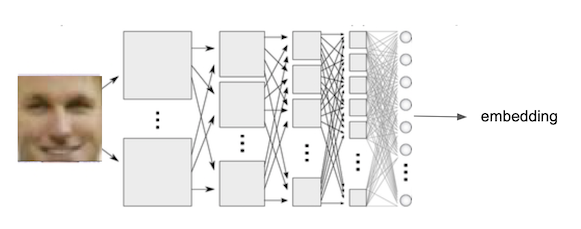

Функция TripletLoss работает напрямую с этими вложениями. Идея состоит в том, чтобы сделать вложения одних и тех же людей более близкими, компактными в пространстве вложений, а вложения разных людей более отдельными. Есть формула потери:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

гже
- $e$ эмбеддинг фото (output of a model)
- $p$ позитивный эмбеддинг для фото (эмбеддинг $e$ должен быть близок)
- $n$ негативный эмбеддинг для фото (эмбеддинг $e$ должен быть далек)
- $d(x, y)$ расстояние между эмбеддингами
- margin — позитивный margin для еще большего увеличения разницы мужду $d(a, p)$ и $d(a, n)$

**Все эмбеддинги $e$, $p$ и $n$ должны быть нормализованы для передачи в функцию потерь**.

В нашем случае для данной фотографии $E$ и ее эмбеддингом $e$ положительный эмбеддинг $p$ должен быть эмбеддингом фотографии того же человека, а эмбеддинг $n$ должен быть эмбеддингом фотографии другого человека.

Про TripletLoss for PyTorch можно прочесть [тут](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss). Существуют различные варианты TripletLoss, которые также могут повысить производительность и которые вы можете реализовать самостоятельно, если хотите:
- uиспользовать больше одного варианта $p$ и $n$ для одного эмбеддинга $e$ 
- использовать специальные негативные эмбеддинги: т.е. negatives, которые очень близко к e (для усиления отношения отдаления от e)


**Больше прочитать про TripletLoss**:

Как идея TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss

PyTorch пример TripletLoss: https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss

**Пример**: обучим модель на функции потерь TripletLoss.

In [220]:
transform_train = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(300, 300)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(300, 300)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [233]:
train_data = TripletDataset('train', transform_train)
val_data = TripletDataset('val', transform)
test_data = TripletDataset('test', transform)

batch_size = 8

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


In [234]:
clear_ram()

In [235]:
model_efficientnet = timm.create_model('efficientnet_b3a', pretrained=True)
# model_resnet = timm.create_model('resnet50', pretrained=True)

In [236]:
# model_resnet
model_efficientnet

EfficientNet(
  (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNormAct2d(
          40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
    

In [237]:
clear_ram()

In [238]:
# model_resnet.fc = nn.Sequential(
#     nn.Linear(2048, 256),
#     nn.BatchNorm1d(256)
# )
model_efficientnet.classifier = nn.Sequential(
    nn.Linear(1536, 256),
    nn.BatchNorm1d(256)
)
# embeddingNetwork = model_resnet
embeddingNetwork = model_efficientnet

In [239]:
classifierNetwork = classifierNet(embeddingNetwork)

In [240]:
classifierNetwork.to(device)

classifierNet(
  (embeddingLayer): EfficientNet(
    (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
          (bn1): BatchNormAct2d(
            40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(40, 24, ker

In [241]:
clear_ram()

In [242]:
optimizer = Adam(classifierNetwork.parameters(), lr=1e-4, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [243]:
distance_function=l_infinity
margin=1.5
swap=True

loss_fn = custom_loss(distance_function, margin, swap)

In [244]:
model, history = train_TripletLoss(
    train_data,
    val_data,
    model = classifierNetwork,
    epochs = 50,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = loss_fn
)

epoch:   0%|                                                                                    | 0/50 [00:00<?, ?it/s]

loss 7.7447490071536


epoch:   2%|█▍                                                                       | 1/50 [05:30<4:29:35, 330.12s/it]


Epoch 001 train_loss: 7.7447     val_loss 6.8786 train_acc 0.0103 val_acc 0.0330
loss 6.517962770069136


epoch:   4%|██▉                                                                      | 2/50 [11:01<4:24:50, 331.05s/it]


Epoch 002 train_loss: 6.5180     val_loss 5.7056 train_acc 0.0695 val_acc 0.1539
loss 5.420598059557797


epoch:   6%|████▍                                                                    | 3/50 [16:34<4:19:59, 331.91s/it]


Epoch 003 train_loss: 5.4206     val_loss 4.6704 train_acc 0.1943 val_acc 0.3365
loss 4.432944994071003


epoch:   8%|█████▊                                                                   | 4/50 [22:06<4:14:27, 331.91s/it]


Epoch 004 train_loss: 4.4329     val_loss 4.2635 train_acc 0.3773 val_acc 0.4579
loss 3.667164831795496


epoch:  10%|███████▎                                                                 | 5/50 [27:37<4:08:41, 331.58s/it]


Epoch 005 train_loss: 3.6672     val_loss 3.5712 train_acc 0.5399 val_acc 0.5927
loss 3.1854964938949557


epoch:  12%|████████▊                                                                | 6/50 [33:09<4:03:06, 331.50s/it]


Epoch 006 train_loss: 3.1855     val_loss 3.3664 train_acc 0.6447 val_acc 0.6384
loss 2.868076206034935


epoch:  14%|██████████▏                                                              | 7/50 [38:40<3:57:30, 331.40s/it]


Epoch 007 train_loss: 2.8681     val_loss 3.4323 train_acc 0.7184 val_acc 0.6496
loss 2.6090522747807734


epoch:  16%|███████████▋                                                             | 8/50 [44:11<3:51:59, 331.42s/it]


Epoch 008 train_loss: 2.6091     val_loss 3.2662 train_acc 0.7827 val_acc 0.6842
loss 2.4653638222914065


epoch:  18%|█████████████▏                                                           | 9/50 [49:42<3:46:23, 331.31s/it]


Epoch 009 train_loss: 2.4654     val_loss 3.2790 train_acc 0.8145 val_acc 0.7029
loss 2.3865385401561467


epoch:  20%|██████████████▍                                                         | 10/50 [55:15<3:41:07, 331.69s/it]


Epoch 010 train_loss: 2.3865     val_loss 3.3534 train_acc 0.8296 val_acc 0.6864
loss 2.28869855560167


epoch:  22%|███████████████▍                                                      | 11/50 [1:00:49<3:36:03, 332.39s/it]


Epoch 011 train_loss: 2.2887     val_loss 3.3107 train_acc 0.8592 val_acc 0.7039
loss 2.2098906856127893


epoch:  24%|████████████████▊                                                     | 12/50 [1:06:21<3:30:26, 332.27s/it]


Epoch 012 train_loss: 2.2099     val_loss 3.4135 train_acc 0.8741 val_acc 0.6720
loss 2.2007058052980946


epoch:  26%|██████████████████▏                                                   | 13/50 [1:11:53<3:24:48, 332.12s/it]


Epoch 013 train_loss: 2.2007     val_loss 3.3123 train_acc 0.8776 val_acc 0.7295
loss 2.111755094613029


epoch:  28%|███████████████████▌                                                  | 14/50 [1:17:23<3:18:53, 331.49s/it]


Epoch 014 train_loss: 2.1118     val_loss 3.1734 train_acc 0.8998 val_acc 0.7476
loss 2.119008316752616


epoch:  30%|█████████████████████                                                 | 15/50 [1:22:55<3:13:30, 331.72s/it]


Epoch 015 train_loss: 2.1190     val_loss 3.1677 train_acc 0.9000 val_acc 0.7417
loss 2.0702046265316367


epoch:  32%|██████████████████████▍                                               | 16/50 [1:28:28<3:08:17, 332.27s/it]


Epoch 016 train_loss: 2.0702     val_loss 3.3615 train_acc 0.9113 val_acc 0.7167
loss 2.039241230554795


epoch:  34%|███████████████████████▊                                              | 17/50 [1:34:01<3:02:53, 332.52s/it]


Epoch 017 train_loss: 2.0392     val_loss 3.2693 train_acc 0.9183 val_acc 0.7519
loss 2.0420424521862346


epoch:  36%|█████████████████████████▏                                            | 18/50 [1:39:34<2:57:23, 332.62s/it]


Epoch 018 train_loss: 2.0420     val_loss 3.2608 train_acc 0.9146 val_acc 0.7279
loss 1.990682259146194


epoch:  38%|██████████████████████████▌                                           | 19/50 [1:45:07<2:51:49, 332.57s/it]


Epoch 019 train_loss: 1.9907     val_loss 3.2290 train_acc 0.9324 val_acc 0.7433
loss 1.9878858883729142


epoch:  40%|████████████████████████████                                          | 20/50 [1:50:41<2:46:31, 333.04s/it]


Epoch 020 train_loss: 1.9879     val_loss 3.2847 train_acc 0.9292 val_acc 0.7529
loss 1.995289472716578


epoch:  42%|█████████████████████████████▍                                        | 21/50 [1:56:14<2:41:02, 333.20s/it]


Epoch 021 train_loss: 1.9953     val_loss 3.3490 train_acc 0.9292 val_acc 0.7194
loss 1.9680995979112632


epoch:  44%|██████████████████████████████▊                                       | 22/50 [2:01:48<2:35:33, 333.34s/it]


Epoch 022 train_loss: 1.9681     val_loss 3.2595 train_acc 0.9339 val_acc 0.7487
loss 1.9438937172461093


epoch:  46%|████████████████████████████████▏                                     | 23/50 [2:07:21<2:29:54, 333.12s/it]


Epoch 023 train_loss: 1.9439     val_loss 3.2660 train_acc 0.9354 val_acc 0.7449
loss 1.9049694367339103


epoch:  48%|█████████████████████████████████▌                                    | 24/50 [2:12:54<2:24:21, 333.12s/it]


Epoch 024 train_loss: 1.9050     val_loss 3.1310 train_acc 0.9489 val_acc 0.7668
loss 1.9249789594264513


epoch:  50%|███████████████████████████████████                                   | 25/50 [2:18:26<2:18:42, 332.90s/it]


Epoch 025 train_loss: 1.9250     val_loss 3.2299 train_acc 0.9431 val_acc 0.7599
loss 1.9376512791556812


epoch:  52%|████████████████████████████████████▍                                 | 26/50 [2:23:59<2:13:05, 332.71s/it]


Epoch 026 train_loss: 1.9377     val_loss 3.1931 train_acc 0.9409 val_acc 0.7604
loss 1.910989996645781


epoch:  54%|█████████████████████████████████████▊                                | 27/50 [2:29:30<2:07:23, 332.31s/it]


Epoch 027 train_loss: 1.9110     val_loss 3.1169 train_acc 0.9430 val_acc 0.7646
loss 1.8843836114647683


epoch:  56%|███████████████████████████████████████▏                              | 28/50 [2:35:03<2:01:53, 332.45s/it]


Epoch 028 train_loss: 1.8844     val_loss 3.1479 train_acc 0.9500 val_acc 0.7780
loss 1.8999664572517523


epoch:  58%|████████████████████████████████████████▌                             | 29/50 [2:40:36<1:56:25, 332.66s/it]


Epoch 029 train_loss: 1.9000     val_loss 3.0941 train_acc 0.9439 val_acc 0.7870
loss 1.8721341103426972


epoch:  60%|██████████████████████████████████████████                            | 30/50 [2:46:09<1:50:56, 332.80s/it]


Epoch 030 train_loss: 1.8721     val_loss 3.0386 train_acc 0.9517 val_acc 0.7785
loss 1.844785842891043


epoch:  62%|███████████████████████████████████████████▍                          | 31/50 [2:51:42<1:45:24, 332.87s/it]


Epoch 031 train_loss: 1.8448     val_loss 3.0855 train_acc 0.9580 val_acc 0.7641
loss 1.8605042295286272


epoch:  64%|████████████████████████████████████████████▊                         | 32/50 [2:57:14<1:39:48, 332.72s/it]


Epoch 032 train_loss: 1.8605     val_loss 3.1660 train_acc 0.9500 val_acc 0.7673
loss 1.873476890365729


epoch:  66%|██████████████████████████████████████████████▏                       | 33/50 [3:02:47<1:34:17, 332.81s/it]


Epoch 033 train_loss: 1.8735     val_loss 3.0609 train_acc 0.9494 val_acc 0.7812
loss 1.78997461313612


epoch:  68%|███████████████████████████████████████████████▌                      | 34/50 [3:08:22<1:28:52, 333.25s/it]


Epoch 034 train_loss: 1.7900     val_loss 3.2014 train_acc 0.9671 val_acc 0.7577
loss 1.8201171280292983


epoch:  70%|█████████████████████████████████████████████████                     | 35/50 [3:13:54<1:23:15, 333.02s/it]


Epoch 035 train_loss: 1.8201     val_loss 3.1708 train_acc 0.9583 val_acc 0.7684
loss 1.8061323420385296


epoch:  72%|██████████████████████████████████████████████████▍                   | 36/50 [3:19:25<1:17:34, 332.50s/it]


Epoch 036 train_loss: 1.8061     val_loss 2.9926 train_acc 0.9630 val_acc 0.7843
loss 1.8226752285653731


epoch:  74%|███████████████████████████████████████████████████▊                  | 37/50 [3:24:56<1:11:55, 331.97s/it]


Epoch 037 train_loss: 1.8227     val_loss 3.0342 train_acc 0.9561 val_acc 0.7870
loss 1.7859272974707214


epoch:  76%|█████████████████████████████████████████████████████▏                | 38/50 [3:30:26<1:06:17, 331.47s/it]


Epoch 038 train_loss: 1.7859     val_loss 3.1475 train_acc 0.9635 val_acc 0.7630
loss 1.7643665009446805


epoch:  78%|██████████████████████████████████████████████████████▌               | 39/50 [3:35:58<1:00:45, 331.44s/it]


Epoch 039 train_loss: 1.7644     val_loss 3.0085 train_acc 0.9684 val_acc 0.7886
loss 1.7963002397772971


epoch:  80%|█████████████████████████████████████████████████████████▌              | 40/50 [3:41:28<55:10, 331.05s/it]


Epoch 040 train_loss: 1.7963     val_loss 3.0005 train_acc 0.9617 val_acc 0.7865
loss 1.7709998298673595


epoch:  82%|███████████████████████████████████████████████████████████             | 41/50 [3:46:59<49:38, 330.92s/it]


Epoch 041 train_loss: 1.7710     val_loss 2.9853 train_acc 0.9654 val_acc 0.7833
loss 1.7351351514291227


epoch:  84%|████████████████████████████████████████████████████████████▍           | 42/50 [3:52:30<44:08, 331.03s/it]


Epoch 042 train_loss: 1.7351     val_loss 2.9355 train_acc 0.9731 val_acc 0.7891
loss 1.755958838186014


epoch:  86%|█████████████████████████████████████████████████████████████▉          | 43/50 [3:58:02<38:40, 331.43s/it]


Epoch 043 train_loss: 1.7560     val_loss 3.0367 train_acc 0.9645 val_acc 0.7827
loss 1.7472366872574954


epoch:  88%|███████████████████████████████████████████████████████████████▎        | 44/50 [4:03:33<33:08, 331.35s/it]


Epoch 044 train_loss: 1.7472     val_loss 2.9938 train_acc 0.9691 val_acc 0.7812
loss 1.7534008790714464


epoch:  90%|████████████████████████████████████████████████████████████████▊       | 45/50 [4:09:04<27:36, 331.24s/it]


Epoch 045 train_loss: 1.7534     val_loss 2.8820 train_acc 0.9654 val_acc 0.7950
loss 1.719096370515752


epoch:  92%|██████████████████████████████████████████████████████████████████▏     | 46/50 [4:14:36<22:05, 331.47s/it]


Epoch 046 train_loss: 1.7191     val_loss 2.8495 train_acc 0.9726 val_acc 0.7939
loss 1.7247856993800246


epoch:  94%|███████████████████████████████████████████████████████████████████▋    | 47/50 [4:20:09<16:35, 331.89s/it]


Epoch 047 train_loss: 1.7248     val_loss 3.0290 train_acc 0.9686 val_acc 0.7625
loss 1.727920202391871


epoch:  96%|█████████████████████████████████████████████████████████████████████   | 48/50 [4:25:41<11:03, 331.69s/it]


Epoch 048 train_loss: 1.7279     val_loss 2.9691 train_acc 0.9680 val_acc 0.7934
loss 1.7106422774130932


epoch:  98%|██████████████████████████████████████████████████████████████████████▌ | 49/50 [4:31:12<05:31, 331.71s/it]


Epoch 049 train_loss: 1.7106     val_loss 2.8554 train_acc 0.9707 val_acc 0.7982
loss 1.701721575822723


epoch: 100%|████████████████████████████████████████████████████████████████████████| 50/50 [4:36:43<00:00, 332.08s/it]


Epoch 050 train_loss: 1.7017     val_loss 2.9894 train_acc 0.9727 val_acc 0.7833
Best val Loss: 0.798190


In [274]:
results.loc[1] = ['TripletLoss_50', 0.798190, 0]
results

,model,train_accuracy,test_accuracy
0,CE_50,0.78967,0.787288
1,TripletLoss_50,0.79819,0.000000


In [245]:
torch.save(model.state_dict(), 'model_TripletLoss_50_.pth')

In [246]:
model = classifierNetwork

In [247]:
model.to(device)
model.load_state_dict(torch.load('model_TripletLoss_50_.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [248]:
epoch, loss, val_loss, acc, val_acc = zip(*history)

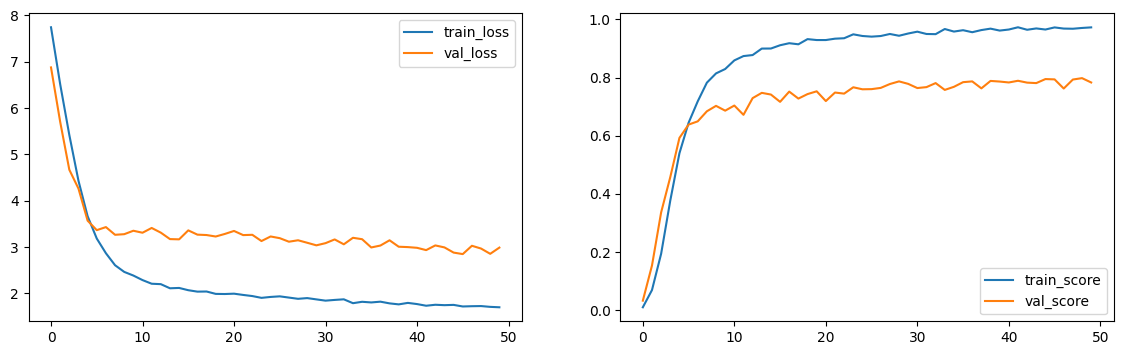

In [249]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

In [250]:
test_accuracy, test_loss = evaluate_TripletLoss(model, test_loader, loss_fn)
test_accuracy, test_loss

(array(0.7948395, dtype=float32), 2.9164778790881285)

In [275]:
results['test_accuracy'][1] = float(test_accuracy)
results

,model,train_accuracy,test_accuracy
0,CE_50,0.78967,0.787288
1,TripletLoss_50,0.79819,0.794840


In [251]:
clear_ram()

С данной метрикой лосса модель показала результат в 0.7948395. Уже получше.

### ArcFace Loss (Additive Angular Margin Loss)

Этот лосс является чем-то вроде "SOTA" для систем распознавания лиц (в чем-то — потому что на самом деле разные варианты потерь и их комбинации могут быть оптимальными для разных сетевых архитектур). Эта потеря наследует идею потери CE, но развивает ее для достижения лучшего распределения вложений на сфере. Он вводит некоторые геодезические ограничения для повышения компактности внутри класса и несоответствия между классами.

**Как работает ArcFace loss**:

Этот лосс является разновидностью стандартного лосса SoftMax CE, который заставляет эмбеддинги разных классов (людей) быть дальше: иметь более разреженное представление эмбеддингов в пространстве эмбеддингов, обеспечивать более очевидный разрыв между ближайшими классами.

Стандартный SoftMax CE loss для задачи классификации выглядит так:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

где:
- $x_i \in \mathbb{R^d}$ обозначает глубокий признак $i$-го образца, принадлежащего $y_i$-му классу;
- $W_j \in \mathbb{R^d}$ обозначает j-й столбец веса;
- $W \in \mathbb{R^d}$ и $b_j \in \mathbb{R^d}$ это смещение (bias);
- $N$ — размер batch'а;
- $n$ — номер класса.

Похоже, что, хотя эта потеря работает хорошо, она явно не оптимизирует встраивание признаков, чтобы обеспечить более высокое сходство для внутриклассовых выборок и разнообразие для межклассовых выборок, что приводит к разрыву в производительности для глубокого распознавания лиц при больших внутриклассовых выборках. вариации внешнего вида класса.

Давайте немного поработаем над этой формулой потерь:
- приравняем bias $b_j=0$;
- нормализуем веса ||$W_j$|| = 1;
- номализуем эмбеддинги ||$x_i$|| = 1 и маштабируем его до s (s это гиперпараметр)

Шаг нормализации эмбеддингов и весов делает предсказания зависящими только от угла между вложением и весом. Таким образом, изученные вложения распределяются по гиперсфере радиусом s.

Тогда наша loss function будет:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Последний шаг: давайте добавим аддитивный штраф за угловой запас $m$ между $x_i$ и $W_{y_i}$, чтобы одновременно повысить компактность внутри класса и несоответствие между классами:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Вот наша ArcFace loss. И мы можем играться с 2 гиперпараметрами: s и m.

В оригинале почитать о ArcFace: https://arxiv.org/pdf/1801.07698.pdf

Оригинальный репозиторий с примером: https://github.com/deepinsight/insightface

**Пример**: обучим нашу модель с использованием функции потерь - ArcFace loss.

In [276]:
transform_train = transforms.Compose([
      transforms.RandomHorizontalFlip(0.5),
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(330, 330)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
transform = transforms.Compose([
      transforms.CenterCrop(size=120),
      transforms.Resize(size=(330, 330)),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_data = celebADataset('train', transform_train)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

batch_size = 16
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

Количество фотографий в train : 8544
Количество фотографий в val : 1878
Количество фотографий в test : 1589


In [277]:
model_efficientnet = timm.create_model('efficientnet_b3a', pretrained=True)
# model_resnet = timm.create_model('resnet50', pretrained=True)

In [278]:
model_efficientnet
# model_resnet

EfficientNet(
  (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNormAct2d(
          40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
    

In [279]:
# model_resnet.fc = nn.Sequential(
#     nn.Linear(2048, 256),
#     nn.BatchNorm1d(256)
# )
model_efficientnet.classifier = nn.Sequential(
    nn.Linear(1536, 256),
    nn.BatchNorm1d(256)
)
# embeddingNetwork = model_resnet
embeddingNetwork = model_efficientnet
# embeddingNetwork = model_resnet

In [280]:
embeddingNetwork

EfficientNet(
  (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNormAct2d(
          40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
    

In [281]:
classifierNetWork_ArcFace = classifierNet_ArcFace(embeddingNetwork)
classifierNetWork_ArcFace.to(device)

classifierNet_ArcFace(
  (embeddingLayer): EfficientNet(
    (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
          (bn1): BatchNormAct2d(
            40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(40,

In [282]:
optimizer = Adam(classifierNetWork_ArcFace.parameters(), lr=1e-3, betas=(0.9, 0.99)) #добавлено для оптимизации
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) #добавлено для оптимизации

In [283]:
clear_ram()

In [284]:
n_classes = n_classes
embedding_size = 256
margin = 28.6
scale = 64

loss_fn = custom_loss_ArcFace(n_classes, embedding_size, margin, scale)

In [285]:
model, history = train_ArcFace(
    train_data,
    val_data,
    model = classifierNetWork_ArcFace,
    epochs = 50,
    batch_size = batch_size,
    optimizer = optimizer,
    sheduler = exp_lr_scheduler,
    criterion = loss_fn
)

epoch:   0%|                                                                                    | 0/50 [00:00<?, ?it/s]

loss 43.70233182157023


epoch:   2%|█▍                                                                       | 1/50 [01:41<1:22:51, 101.46s/it]


Epoch 001 train_loss: 43.7023     val_loss 40.4874 train_acc 0.0197 val_acc 0.0650
loss 38.69434054513996


epoch:   4%|██▉                                                                      | 2/50 [03:23<1:21:24, 101.75s/it]


Epoch 002 train_loss: 38.6943     val_loss 36.4555 train_acc 0.1998 val_acc 0.3530
loss 33.30140243844593


epoch:   6%|████▍                                                                    | 3/50 [05:06<1:20:02, 102.19s/it]


Epoch 003 train_loss: 33.3014     val_loss 31.7622 train_acc 0.5452 val_acc 0.5847
loss 26.74138090940897


epoch:   8%|█████▊                                                                   | 4/50 [06:49<1:18:39, 102.60s/it]


Epoch 004 train_loss: 26.7414     val_loss 26.9164 train_acc 0.7711 val_acc 0.6880
loss 19.63511817374926


epoch:  10%|███████▎                                                                 | 5/50 [08:33<1:17:16, 103.04s/it]


Epoch 005 train_loss: 19.6351     val_loss 22.2195 train_acc 0.8797 val_acc 0.7524
loss 13.3075485693828


epoch:  12%|████████▊                                                                | 6/50 [10:18<1:16:06, 103.79s/it]


Epoch 006 train_loss: 13.3075     val_loss 18.3894 train_acc 0.9394 val_acc 0.7843
loss 8.83365204048514


epoch:  14%|██████████▏                                                              | 7/50 [12:03<1:14:45, 104.32s/it]


Epoch 007 train_loss: 8.8337     val_loss 16.3605 train_acc 0.9709 val_acc 0.7881
loss 5.964360498756951


epoch:  16%|███████████▋                                                             | 8/50 [13:49<1:13:19, 104.76s/it]


Epoch 008 train_loss: 5.9644     val_loss 14.6985 train_acc 0.9801 val_acc 0.8024
loss 4.000012901196542


epoch:  18%|█████████████▏                                                           | 9/50 [15:35<1:11:47, 105.06s/it]


Epoch 009 train_loss: 4.0000     val_loss 15.0280 train_acc 0.9895 val_acc 0.8056
loss 3.4506790278416672


epoch:  20%|██████████████▍                                                         | 10/50 [17:21<1:10:11, 105.28s/it]


Epoch 010 train_loss: 3.4507     val_loss 14.7727 train_acc 0.9895 val_acc 0.7918
loss 2.622039302210376


epoch:  22%|███████████████▊                                                        | 11/50 [19:06<1:08:31, 105.42s/it]


Epoch 011 train_loss: 2.6220     val_loss 13.8361 train_acc 0.9932 val_acc 0.8120
loss 2.594268572364789


epoch:  24%|█████████████████▎                                                      | 12/50 [20:52<1:06:50, 105.54s/it]


Epoch 012 train_loss: 2.5943     val_loss 14.4146 train_acc 0.9908 val_acc 0.8030
loss 2.5240567208765676


epoch:  26%|██████████████████▋                                                     | 13/50 [22:38<1:05:12, 105.74s/it]


Epoch 013 train_loss: 2.5241     val_loss 13.3990 train_acc 0.9909 val_acc 0.8174
loss 2.094565771042268


epoch:  28%|████████████████████▏                                                   | 14/50 [24:25<1:03:34, 105.97s/it]


Epoch 014 train_loss: 2.0946     val_loss 13.9988 train_acc 0.9917 val_acc 0.8072
loss 2.054070857546008


epoch:  30%|█████████████████████▌                                                  | 15/50 [26:11<1:01:52, 106.07s/it]


Epoch 015 train_loss: 2.0541     val_loss 13.9392 train_acc 0.9916 val_acc 0.8024
loss 1.7371521068742144


epoch:  32%|███████████████████████                                                 | 16/50 [27:58<1:00:11, 106.23s/it]


Epoch 016 train_loss: 1.7372     val_loss 13.5508 train_acc 0.9925 val_acc 0.8009
loss 1.7472506610882443


epoch:  34%|█████████████████████████▏                                                | 17/50 [29:44<58:25, 106.22s/it]


Epoch 017 train_loss: 1.7473     val_loss 14.1410 train_acc 0.9922 val_acc 0.7966
loss 1.77748756202318


epoch:  36%|██████████████████████████▋                                               | 18/50 [31:30<56:40, 106.25s/it]


Epoch 018 train_loss: 1.7775     val_loss 13.7044 train_acc 0.9896 val_acc 0.8056
loss 1.3423316742142348


epoch:  38%|████████████████████████████                                              | 19/50 [33:17<54:54, 106.28s/it]


Epoch 019 train_loss: 1.3423     val_loss 13.1210 train_acc 0.9951 val_acc 0.8120
loss 1.6341893577752606


epoch:  40%|█████████████████████████████▌                                            | 20/50 [35:03<53:07, 106.24s/it]


Epoch 020 train_loss: 1.6342     val_loss 13.7999 train_acc 0.9908 val_acc 0.8083
loss 1.5372472130141668


epoch:  42%|███████████████████████████████                                           | 21/50 [36:49<51:19, 106.18s/it]


Epoch 021 train_loss: 1.5372     val_loss 14.2564 train_acc 0.9919 val_acc 0.7923
loss 1.403320986150599


epoch:  44%|████████████████████████████████▌                                         | 22/50 [38:35<49:34, 106.24s/it]


Epoch 022 train_loss: 1.4033     val_loss 13.9905 train_acc 0.9932 val_acc 0.7961
loss 1.656096096657639


epoch:  46%|██████████████████████████████████                                        | 23/50 [40:21<47:46, 106.16s/it]


Epoch 023 train_loss: 1.6561     val_loss 13.0644 train_acc 0.9896 val_acc 0.8126
loss 1.4112494786193444


epoch:  48%|███████████████████████████████████▌                                      | 24/50 [42:07<46:01, 106.20s/it]


Epoch 024 train_loss: 1.4112     val_loss 13.9874 train_acc 0.9909 val_acc 0.8040
loss 1.1666417779908735


epoch:  50%|█████████████████████████████████████                                     | 25/50 [43:54<44:19, 106.38s/it]


Epoch 025 train_loss: 1.1666     val_loss 13.7545 train_acc 0.9937 val_acc 0.8024
loss 1.1082802866050672


epoch:  52%|██████████████████████████████████████▍                                   | 26/50 [45:41<42:34, 106.44s/it]


Epoch 026 train_loss: 1.1083     val_loss 13.3998 train_acc 0.9952 val_acc 0.8083
loss 1.233259041996523


epoch:  54%|███████████████████████████████████████▉                                  | 27/50 [47:27<40:48, 106.47s/it]


Epoch 027 train_loss: 1.2333     val_loss 13.6634 train_acc 0.9917 val_acc 0.7918
loss 1.1788952941972448


epoch:  56%|█████████████████████████████████████████▍                                | 28/50 [49:13<39:00, 106.37s/it]


Epoch 028 train_loss: 1.1789     val_loss 15.4106 train_acc 0.9925 val_acc 0.7827
loss 1.2429742305889704


epoch:  58%|██████████████████████████████████████████▉                               | 29/50 [51:00<37:15, 106.45s/it]


Epoch 029 train_loss: 1.2430     val_loss 12.9323 train_acc 0.9929 val_acc 0.8136
loss 1.2441343887850267


epoch:  60%|████████████████████████████████████████████▍                             | 30/50 [52:47<35:30, 106.51s/it]


Epoch 030 train_loss: 1.2441     val_loss 13.5734 train_acc 0.9923 val_acc 0.8056
loss 1.4334235075567356


epoch:  62%|█████████████████████████████████████████████▉                            | 31/50 [54:33<33:43, 106.51s/it]


Epoch 031 train_loss: 1.4334     val_loss 13.1430 train_acc 0.9891 val_acc 0.8078
loss 0.950596454576953


epoch:  64%|███████████████████████████████████████████████▎                          | 32/50 [56:20<31:57, 106.53s/it]


Epoch 032 train_loss: 0.9506     val_loss 12.9826 train_acc 0.9944 val_acc 0.8190
loss 0.9335475749313388


epoch:  66%|████████████████████████████████████████████████▊                         | 33/50 [58:06<30:10, 106.51s/it]


Epoch 033 train_loss: 0.9335     val_loss 13.1062 train_acc 0.9932 val_acc 0.8158
loss 1.2467239984538543


epoch:  68%|██████████████████████████████████████████████████▎                       | 34/50 [59:53<28:24, 106.55s/it]


Epoch 034 train_loss: 1.2467     val_loss 13.2646 train_acc 0.9916 val_acc 0.8110
loss 1.033581834410306


epoch:  70%|██████████████████████████████████████████████████▍                     | 35/50 [1:01:40<26:40, 106.67s/it]


Epoch 035 train_loss: 1.0336     val_loss 13.6767 train_acc 0.9938 val_acc 0.8040
loss 1.17739299480197


epoch:  72%|███████████████████████████████████████████████████▊                    | 36/50 [1:03:27<24:54, 106.75s/it]


Epoch 036 train_loss: 1.1774     val_loss 14.4437 train_acc 0.9926 val_acc 0.7971
loss 1.0731434855209654


epoch:  74%|█████████████████████████████████████████████████████▎                  | 37/50 [1:05:13<23:07, 106.72s/it]


Epoch 037 train_loss: 1.0731     val_loss 14.6693 train_acc 0.9931 val_acc 0.7923
loss 0.9526290405674394


epoch:  76%|██████████████████████████████████████████████████████▋                 | 38/50 [1:07:00<21:19, 106.59s/it]


Epoch 038 train_loss: 0.9526     val_loss 12.1749 train_acc 0.9934 val_acc 0.8253
loss 0.8733972179999309


epoch:  78%|████████████████████████████████████████████████████████▏               | 39/50 [1:08:46<19:31, 106.52s/it]


Epoch 039 train_loss: 0.8734     val_loss 12.9000 train_acc 0.9934 val_acc 0.8142
loss 0.8773524051109102


epoch:  80%|█████████████████████████████████████████████████████████▌              | 40/50 [1:10:32<17:43, 106.39s/it]


Epoch 040 train_loss: 0.8774     val_loss 13.8355 train_acc 0.9947 val_acc 0.8024
loss 1.0778421158987535


epoch:  82%|███████████████████████████████████████████████████████████             | 41/50 [1:12:19<15:58, 106.47s/it]


Epoch 041 train_loss: 1.0778     val_loss 12.6886 train_acc 0.9924 val_acc 0.8163
loss 0.7319560565985453


epoch:  84%|████████████████████████████████████████████████████████████▍           | 42/50 [1:14:05<14:11, 106.47s/it]


Epoch 042 train_loss: 0.7320     val_loss 13.0488 train_acc 0.9951 val_acc 0.8046
loss 1.0079475781741687


epoch:  86%|█████████████████████████████████████████████████████████████▉          | 43/50 [1:15:52<12:25, 106.53s/it]


Epoch 043 train_loss: 1.0079     val_loss 12.5332 train_acc 0.9922 val_acc 0.8200
loss 0.6242412498862507


epoch:  88%|███████████████████████████████████████████████████████████████▎        | 44/50 [1:17:38<10:39, 106.50s/it]


Epoch 044 train_loss: 0.6242     val_loss 12.6185 train_acc 0.9958 val_acc 0.8168
loss 0.8913046655520291


epoch:  90%|████████████████████████████████████████████████████████████████▊       | 45/50 [1:19:25<08:52, 106.54s/it]


Epoch 045 train_loss: 0.8913     val_loss 14.1076 train_acc 0.9932 val_acc 0.7849
loss 1.0177058671850818


epoch:  92%|██████████████████████████████████████████████████████████████████▏     | 46/50 [1:21:12<07:06, 106.52s/it]


Epoch 046 train_loss: 1.0177     val_loss 13.8691 train_acc 0.9923 val_acc 0.8003
loss 0.8398826611990033


epoch:  94%|███████████████████████████████████████████████████████████████████▋    | 47/50 [1:22:58<05:19, 106.59s/it]


Epoch 047 train_loss: 0.8399     val_loss 12.7155 train_acc 0.9941 val_acc 0.8126
loss 0.6888502105534905


epoch:  96%|█████████████████████████████████████████████████████████████████████   | 48/50 [1:24:45<03:33, 106.58s/it]


Epoch 048 train_loss: 0.6889     val_loss 12.3208 train_acc 0.9964 val_acc 0.8307
loss 0.7493776866086364


epoch:  98%|██████████████████████████████████████████████████████████████████████▌ | 49/50 [1:26:31<01:46, 106.57s/it]


Epoch 049 train_loss: 0.7494     val_loss 12.6395 train_acc 0.9946 val_acc 0.8179
loss 0.8408930052258717


epoch: 100%|████████████████████████████████████████████████████████████████████████| 50/50 [1:28:18<00:00, 105.97s/it]


Epoch 050 train_loss: 0.8409     val_loss 12.9149 train_acc 0.9947 val_acc 0.8179
Best val Loss: 0.830671


In [286]:
results.loc[2] = ['ArcFace_50', 0.830671, 0]
results

,model,train_accuracy,test_accuracy
0,CE_50,0.789670,0.787288
1,TripletLoss_50,0.798190,0.794840
2,ArcFace_50,0.830671,0.000000


In [287]:
torch.save(model.state_dict(), 'model_ArcFace_50.pth')

In [288]:
model.to(device)
model.load_state_dict(torch.load('model_ArcFace_50.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [289]:
epoch, loss, val_loss, acc, val_acc = zip(*history)

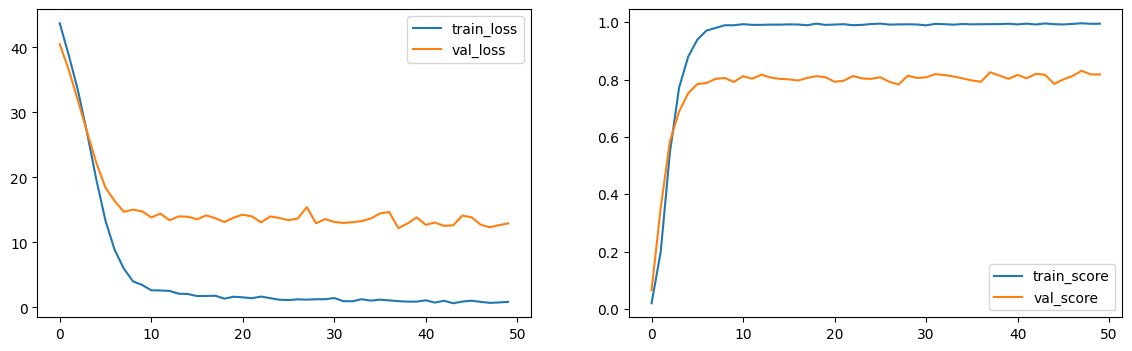

In [290]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].plot(epoch, loss, label='train_loss')
axes[0].plot(epoch, val_loss, label='val_loss')
axes[1].plot(epoch, acc, label='train_score')
axes[1].plot(epoch, val_acc, label='val_score')
for i in [0,1]:
    axes[i].legend()

In [291]:
test_accuracy, test_loss = evaluate_ArcFace(model, test_loader, loss_fn)
test_accuracy, test_loss

(array(0.8156073, dtype=float32), 13.330741229324195)

In [292]:
results['test_accuracy'][2] = float(test_accuracy)
results

,model,train_accuracy,test_accuracy
0,CE_50,0.789670,0.787288
1,TripletLoss_50,0.798190,0.794840
2,ArcFace_50,0.830671,0.815607


In [293]:
clear_ram()

С данной метрикой лосса модель показала результат в 0.815607, что уже неплохо.

### Выводы

Метрика ArcFace показала лучшие результаты из исследуемых. Следует продолжить исследования с подбором еще метрик либо с подпором гиперпараметров используемой модели либо подобрать модель более тежелую, т.е. по тестам данная модель не переобучается.